In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

C:\Users\lfdin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Informações sobre o dataset

Esse dataset foi construído a partir de informações em anúncios de venda de veículos disponíveis online, entre os dias 30/06/2022 e 04/07/2022. Na obtenção dos dados, foram procurados apenas anúncios profissionais de veículos com ano de fabricação a partir de 2000. Além disso, foi verificado no portal de vendas uma quantidade aproximadamente igual de anúncios entre as seguintes faixas de quilometragem: 0-30, 30-60, 60-100, 100+. Sendo assim, de forma a tornar a amostragem realizada mais representativa, os valores de quilometragem nesse dataset seguem uma proporção parecida.

In [2]:
df = pd.read_csv('cars_data_fipe.csv')

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustivel,Cambio,Direcao,...,PotenciaNum,CodMarca,DescricaoLimpa,DescricaoFipe,CodModelo,AnoCombustivel,AnoFipe,CodAno,ChaveFipe,PrecoFipe
0,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,2.0 - 2.9,Diesel,Automático,Elétrica,...,2.5,29,COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,7760,2017 Diesel,2017 Diesel,2017-3,29 7760 2017-3,139372.0
1,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,1.6,59,SAVEIRO 1.6 MI/ 1.6 MI TOTAL FLEX 8V,SAVEIRO 1.6 MI/ 1.6 MI TOTAL FLEX 8V,2553,2014 Gasolina,2014 Gasolina,2014-1,59 2553 2014-1,44834.0
2,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,1.5,56,ETIOS,ETIOS 1.3 FLEX 16V 5P MEC.,6245,2015 Gasolina,2014 Gasolina,2014-1,56 6245 2014-1,45249.0
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN POLO COMFORT. 200 TSI 1.0 FLEX...,Hatch,2021,PR,11139,1.0,Flex,Automático,Hidráulica,...,1.0,59,POLO COMFORT. 200 TSI 1.0 FLEX 12V AUT.,POLO COMFORT. 200 TSI 1.0 FLEX 12V AUT.,8068,2021 Gasolina,2021 Gasolina,2021-1,59 8068 2021-1,91709.0
4,HYUNDAI,HYUNDAI HB20S VISION 1.6 FLEX 16V AUT,Sedã,2021,CE,25223,1.6,Flex,Automático,Hidráulica,...,1.6,26,HB20S VISION 1.6 FLEX 16V AUT,HB20S VISION 1.6 FLEX 16V AUT.,8859,2021 Gasolina,2021 Gasolina,2021-1,26 8859 2021-1,81168.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marca           5167 non-null   object 
 1   Descricao       5167 non-null   object 
 2   Tipo            5167 non-null   object 
 3   Ano             5167 non-null   int64  
 4   UF              5167 non-null   object 
 5   Km              5167 non-null   int64  
 6   Potencia        5167 non-null   object 
 7   Combustivel     5167 non-null   object 
 8   Cambio          5167 non-null   object 
 9   Direcao         5167 non-null   object 
 10  Cor             5167 non-null   object 
 11  FinalDePlaca    5167 non-null   int64  
 12  Portas          5167 non-null   object 
 13  UnicoDono       5167 non-null   object 
 14  AceitaTrocas    5167 non-null   object 
 15  ArCondicionado  5167 non-null   bool   
 16  AirBag          5167 non-null   bool   
 17  Alarme          5167 non-null   b

Dado que as informações fornecidas sobre o veículo são preenchidas pelos próprios revendedores, algumas distorções são observadas. Em alguns casos, por exemplo, o modelo do carro citado não é compatível com o ano de fabricação do mesmo, o que impacta principalmente a consulta à tabela Fipe. Sendo assim, será criada uma flag que indica se a informação fornecida pode estar distorcida em relação à consulta realizada na tabela Fipe.

- `DifAnosFipe`: Diferença de anos observada entre o anúncio e a tabela Fipe;
- `FlagFipe`: Indica se o modelo é compatível com o consultado na tabela Fipe (True) ou não (False). O primeiro pressuposto para isso é que o nome do modelo deve estar contido na descrição consultada na tabela. O segundo pressuposto assumido é de que não deve existir diferença entre o ano informado para o modelo e aquele consultado na tabela Fipe, exceto para situações em que a descrição fornecida é idêntica àquela da tabela ou a diferença de anos é inferior a 1 (devido a possíveis confusões entre ano de fabricação e ano de modelo).

In [4]:
df['DifAnosFipe'] = df.apply(lambda x: x['Ano'] - int(x['AnoFipe'].split(' ')[0]), axis=1)

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustivel,Cambio,Direcao,...,CodMarca,DescricaoLimpa,DescricaoFipe,CodModelo,AnoCombustivel,AnoFipe,CodAno,ChaveFipe,PrecoFipe,DifAnosFipe
0,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,2.0 - 2.9,Diesel,Automático,Elétrica,...,29,COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,7760,2017 Diesel,2017 Diesel,2017-3,29 7760 2017-3,139372.0,0
1,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,59,SAVEIRO 1.6 MI/ 1.6 MI TOTAL FLEX 8V,SAVEIRO 1.6 MI/ 1.6 MI TOTAL FLEX 8V,2553,2014 Gasolina,2014 Gasolina,2014-1,59 2553 2014-1,44834.0,0
2,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,56,ETIOS,ETIOS 1.3 FLEX 16V 5P MEC.,6245,2015 Gasolina,2014 Gasolina,2014-1,56 6245 2014-1,45249.0,1
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN POLO COMFORT. 200 TSI 1.0 FLEX...,Hatch,2021,PR,11139,1.0,Flex,Automático,Hidráulica,...,59,POLO COMFORT. 200 TSI 1.0 FLEX 12V AUT.,POLO COMFORT. 200 TSI 1.0 FLEX 12V AUT.,8068,2021 Gasolina,2021 Gasolina,2021-1,59 8068 2021-1,91709.0,0
4,HYUNDAI,HYUNDAI HB20S VISION 1.6 FLEX 16V AUT,Sedã,2021,CE,25223,1.6,Flex,Automático,Hidráulica,...,26,HB20S VISION 1.6 FLEX 16V AUT,HB20S VISION 1.6 FLEX 16V AUT.,8859,2021 Gasolina,2021 Gasolina,2021-1,26 8859 2021-1,81168.0,0


In [5]:
df['FlagFipe'] = df.apply(lambda x: True if ((abs(x['DifAnosFipe'])==0)and(x['DescricaoLimpa'].replace('.', '')==x['DescricaoFipe'].replace('.', ''))) else False, axis=1)

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustivel,Cambio,Direcao,...,DescricaoLimpa,DescricaoFipe,CodModelo,AnoCombustivel,AnoFipe,CodAno,ChaveFipe,PrecoFipe,DifAnosFipe,FlagFipe
0,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,2.0 - 2.9,Diesel,Automático,Elétrica,...,COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,7760,2017 Diesel,2017 Diesel,2017-3,29 7760 2017-3,139372.0,0,True
1,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,SAVEIRO 1.6 MI/ 1.6 MI TOTAL FLEX 8V,SAVEIRO 1.6 MI/ 1.6 MI TOTAL FLEX 8V,2553,2014 Gasolina,2014 Gasolina,2014-1,59 2553 2014-1,44834.0,0,True
2,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,ETIOS,ETIOS 1.3 FLEX 16V 5P MEC.,6245,2015 Gasolina,2014 Gasolina,2014-1,56 6245 2014-1,45249.0,1,False
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN POLO COMFORT. 200 TSI 1.0 FLEX...,Hatch,2021,PR,11139,1.0,Flex,Automático,Hidráulica,...,POLO COMFORT. 200 TSI 1.0 FLEX 12V AUT.,POLO COMFORT. 200 TSI 1.0 FLEX 12V AUT.,8068,2021 Gasolina,2021 Gasolina,2021-1,59 8068 2021-1,91709.0,0,True
4,HYUNDAI,HYUNDAI HB20S VISION 1.6 FLEX 16V AUT,Sedã,2021,CE,25223,1.6,Flex,Automático,Hidráulica,...,HB20S VISION 1.6 FLEX 16V AUT,HB20S VISION 1.6 FLEX 16V AUT.,8859,2021 Gasolina,2021 Gasolina,2021-1,26 8859 2021-1,81168.0,0,True


In [6]:
len(df.loc[df['FlagFipe']==True])

3659

In [7]:
df.drop(df.loc[df['FlagFipe']==False].index, inplace=True)

len(df)

3659

# Analisando os pontos fracos da Tabela Fipe

Vamos agora analisar os pontos em que a tabela Fipe mais falha em retratar a realidade do mercado de compra e venda de automóveis:

In [8]:
df['DifFipe'] = df['Preco'] - df['PrecoFipe']
df['DifAbsFipe'] = abs(df['Preco'] - df['PrecoFipe'])

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustivel,Cambio,Direcao,...,CodModelo,AnoCombustivel,AnoFipe,CodAno,ChaveFipe,PrecoFipe,DifAnosFipe,FlagFipe,DifFipe,DifAbsFipe
0,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,2.0 - 2.9,Diesel,Automático,Elétrica,...,7760,2017 Diesel,2017 Diesel,2017-3,29 7760 2017-3,139372.0,0,True,428.0,428.0
1,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,2553,2014 Gasolina,2014 Gasolina,2014-1,59 2553 2014-1,44834.0,0,True,5066.0,5066.0
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN POLO COMFORT. 200 TSI 1.0 FLEX...,Hatch,2021,PR,11139,1.0,Flex,Automático,Hidráulica,...,8068,2021 Gasolina,2021 Gasolina,2021-1,59 8068 2021-1,91709.0,0,True,7191.0,7191.0
4,HYUNDAI,HYUNDAI HB20S VISION 1.6 FLEX 16V AUT,Sedã,2021,CE,25223,1.6,Flex,Automático,Hidráulica,...,8859,2021 Gasolina,2021 Gasolina,2021-1,26 8859 2021-1,81168.0,0,True,-269.0,269.0
5,VW - VOLKSWAGEN,VW - VOLKSWAGEN NIVUS COMFORTLINE 1.0 200 TSI ...,SUV,2022,PR,8,1.0,Flex,Manual,Elétrica,...,9150,2022 Gasolina,2022 Gasolina,2022-1,59 9150 2022-1,115925.0,0,True,5975.0,5975.0


## Fipe versus Preço

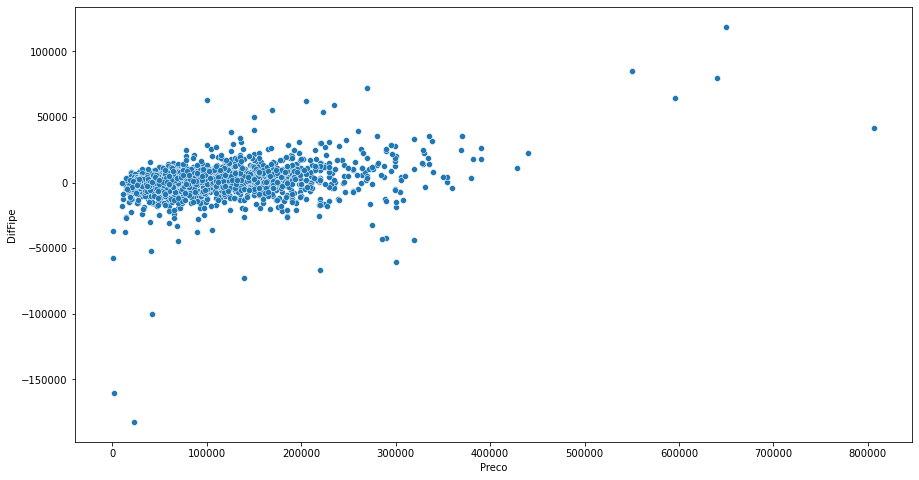

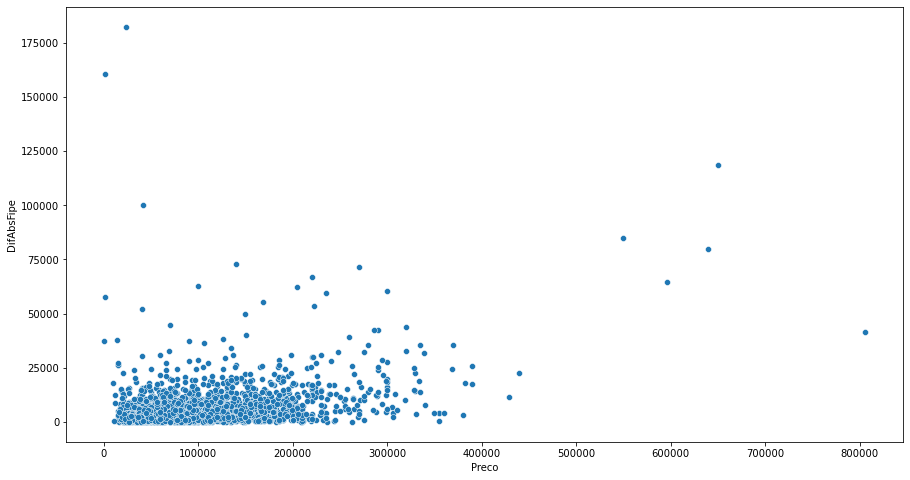

In [9]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Preco', y='DifFipe', data=df);

plt.figure(figsize=(15,8))
sns.scatterplot(x='Preco', y='DifAbsFipe', data=df);

A diferença observada entre a tabela e a realidade do mercado parece ser mais positiva à medida em que aumenta o preço anunciado no veículo. Ou seja, quando o valor do carro é alto, a tabela Fipe tende a errar para baixo em sua projeção e subestimar seu valor.

## Fipe versus Marca

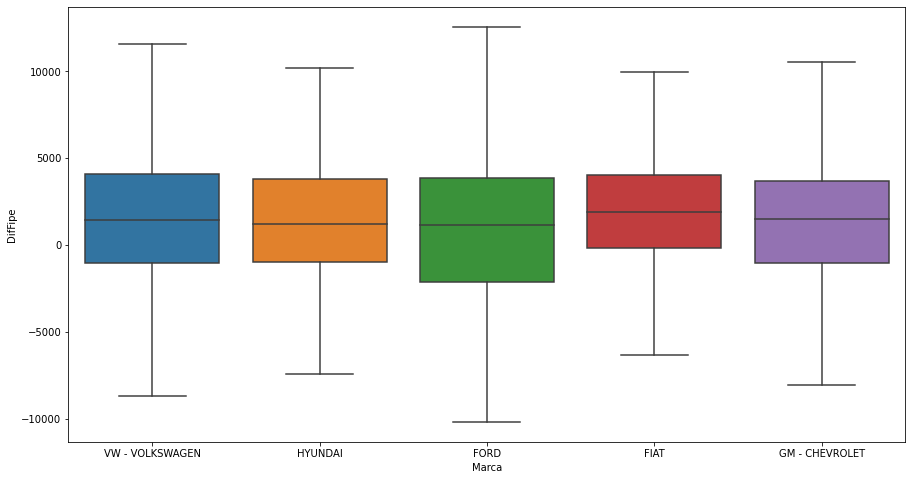

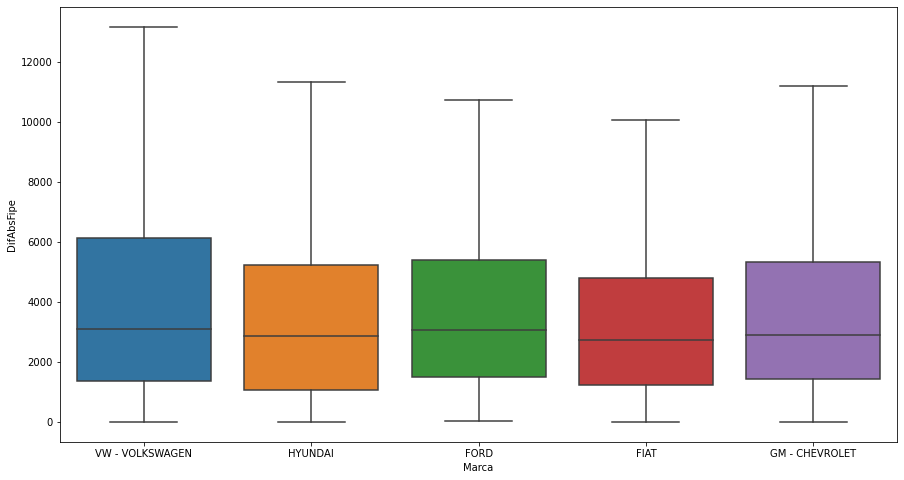

In [10]:
top_5 = df['Marca'].value_counts()[:5].index

plt.figure(figsize=(15,8))
sns.boxplot(x=df.loc[df['Marca'].isin(top_5)]['Marca'],y=df['DifFipe'], showfliers=False);

plt.figure(figsize=(15,8))
sns.boxplot(x=df.loc[df['Marca'].isin(top_5)]['Marca'],y=df['DifAbsFipe'], showfliers=False);

In [11]:
marcas_v_fipe = df.groupby('Marca')[['Preco', 'PrecoFipe', 'DifFipe', 'DifAbsFipe']].mean()
marcas_v_fipe['DifPercentual'] = marcas_v_fipe['DifAbsFipe']/marcas_v_fipe['Preco']

marcas_v_fipe.sort_values('DifPercentual', ascending=False)

,Preco,PrecoFipe,DifFipe,DifAbsFipe,DifPercentual
Marca,,,,,
IVECO,1748.000000,162221.000000,-160473.000000,160473.000000,91.803776
SUBARU,74000.000000,89820.000000,-15820.000000,15820.000000,0.213784
CHRYSLER,39397.500000,43209.750000,-3812.250000,5749.250000,0.145929
PORSCHE,425360.000000,376239.000000,49121.000000,56865.000000,0.133687
MERCEDES-BENZ,181266.076923,183091.846154,-1825.769231,23683.923077,0.130658
LIFAN,36900.000000,33130.000000,3770.000000,3770.000000,0.102168
CITROEN,45412.413793,46139.948276,-727.534483,3878.568966,0.085408
LAND ROVER,141766.666667,135559.083333,6207.583333,11877.083333,0.083779
DODGE,117560.000000,112052.200000,5507.800000,9192.600000,0.078195


## Fipe versus Modelo

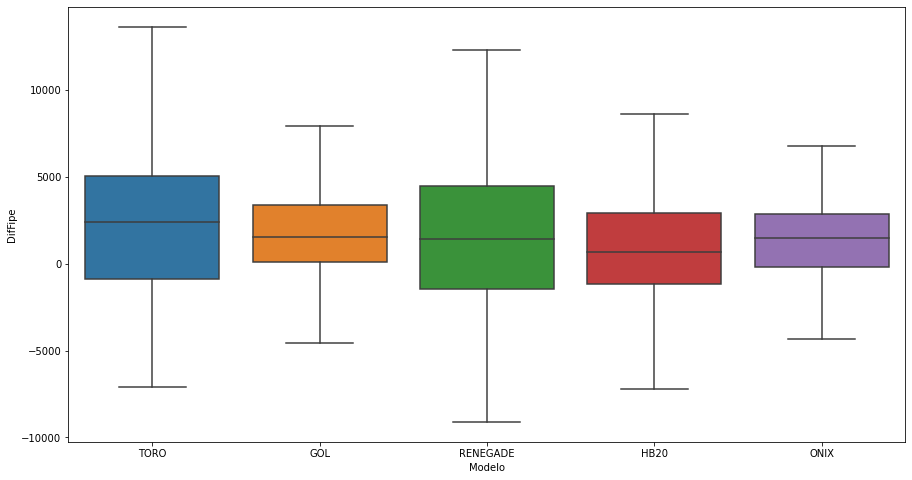

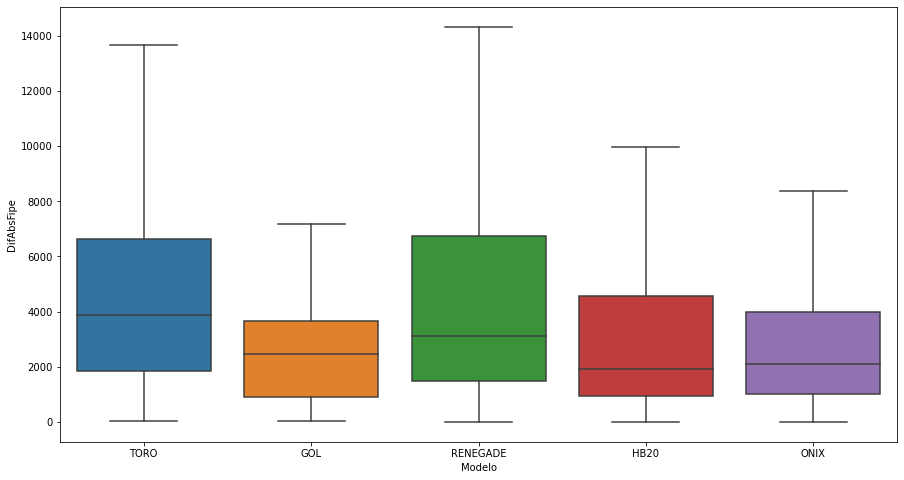

In [12]:
top_5 = df['Modelo'].value_counts()[:5].index

plt.figure(figsize=(15,8))
sns.boxplot(x=df.loc[df['Modelo'].isin(top_5)]['Modelo'],y=df['DifFipe'], showfliers=False);

plt.figure(figsize=(15,8))
sns.boxplot(x=df.loc[df['Modelo'].isin(top_5)]['Modelo'],y=df['DifAbsFipe'], showfliers=False);

## Fipe versus Tipo

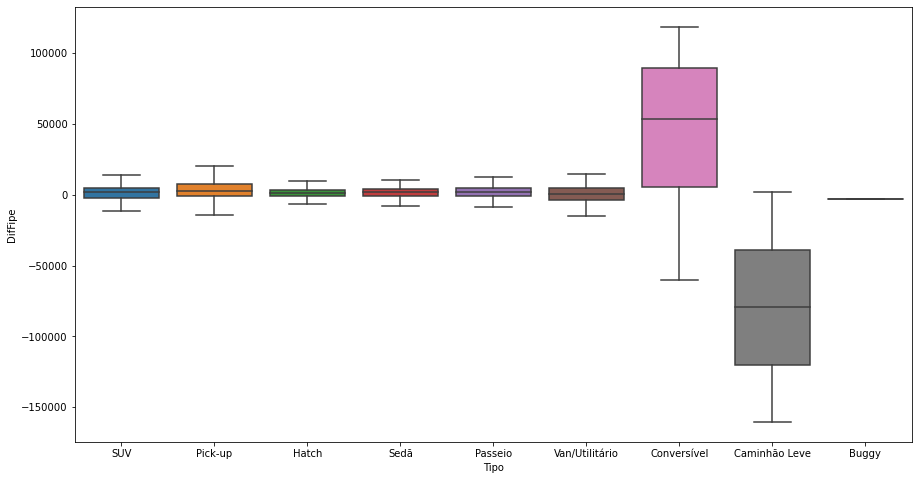

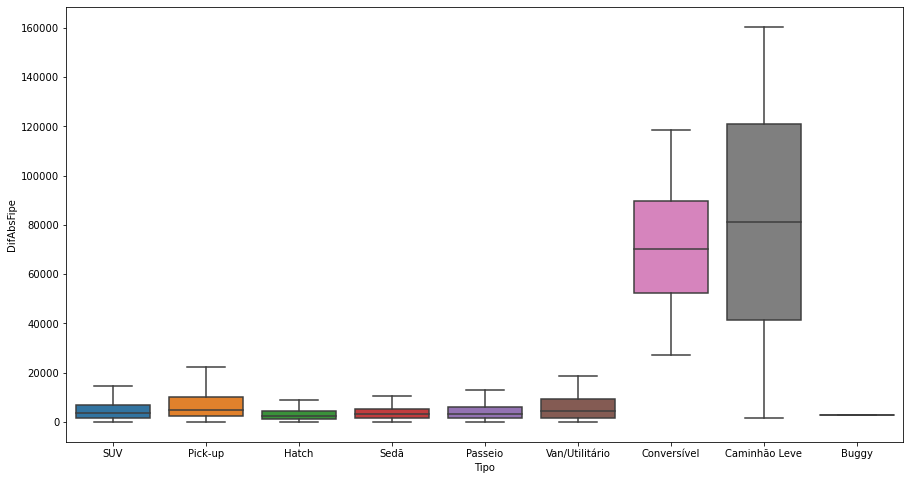

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Tipo'],y=df['DifFipe'], showfliers=False);

plt.figure(figsize=(15,8))
sns.boxplot(x=df['Tipo'],y=df['DifAbsFipe'], showfliers=False);

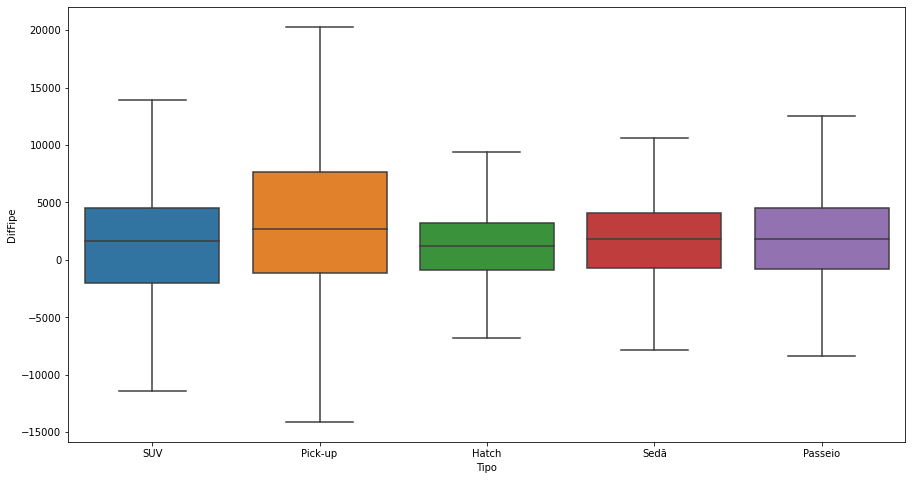

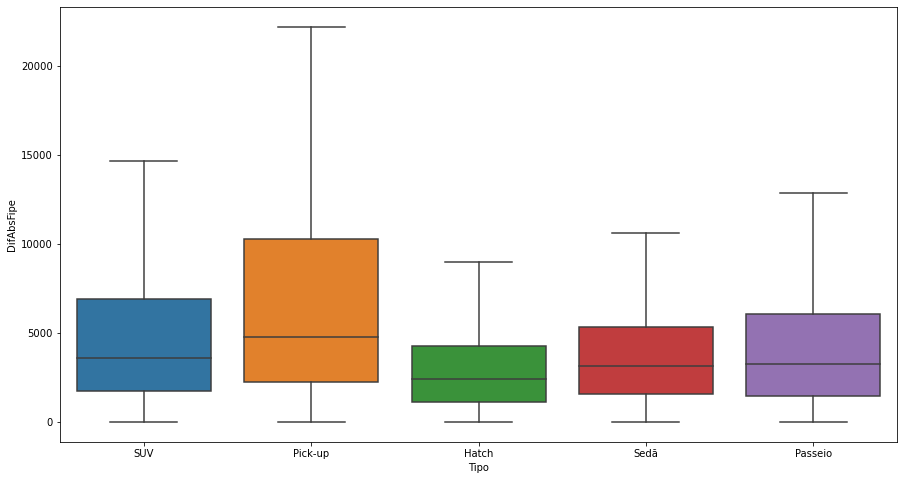

In [14]:
top_5 = df['Tipo'].value_counts()[:5].index

plt.figure(figsize=(15,8))
sns.boxplot(x=df.loc[df['Tipo'].isin(top_5)]['Tipo'],y=df['DifFipe'], showfliers=False);

plt.figure(figsize=(15,8))
sns.boxplot(x=df.loc[df['Tipo'].isin(top_5)]['Tipo'],y=df['DifAbsFipe'], showfliers=False);

In [15]:
tipo_v_fipe = df.groupby('Tipo')[['Preco', 'PrecoFipe', 'DifFipe', 'DifAbsFipe']].mean()
tipo_v_fipe['DifPercentual'] = tipo_v_fipe['DifAbsFipe']/tipo_v_fipe['Preco']

tipo_v_fipe.sort_values('DifPercentual', ascending=False)

,Preco,PrecoFipe,DifFipe,DifAbsFipe,DifPercentual
Tipo,,,,,
Caminhão Leve,31824.000000,111220.500000,-79396.500000,81076.500000,2.547653
Conversível,453722.500000,412380.500000,41342.000000,71598.500000,0.157802
Van/Utilitário,81331.900990,82872.811881,-1540.910891,10022.336634,0.123228
Buggy,43000.000000,45910.000000,-2910.000000,2910.000000,0.067674
Hatch,52691.420368,51827.653304,863.767064,3368.308776,0.063925
Sedã,70922.384393,69821.697977,1100.686416,4455.602601,0.062824
Pick-up,129417.787589,126121.610979,3296.176611,7864.730310,0.060770
SUV,109814.240981,108301.995671,1512.245310,5520.031746,0.050267
Passeio,97264.547330,95256.737864,2007.809466,4840.459951,0.049766


Além de conversíveis e caminhões leves, que são veículos mais raros em nossa base de dados, existe uma diferença considerável nos erros da tabela Fipe para Van/Utilitário.

## Fipe versus Km

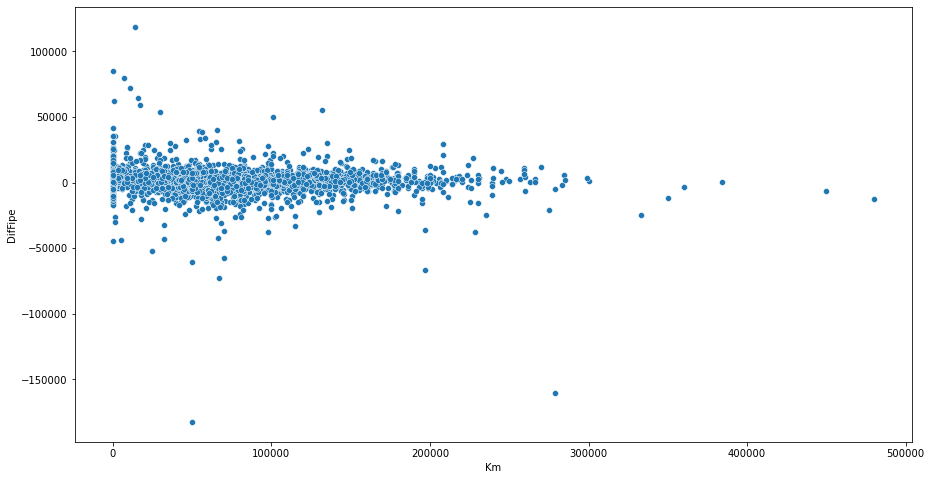

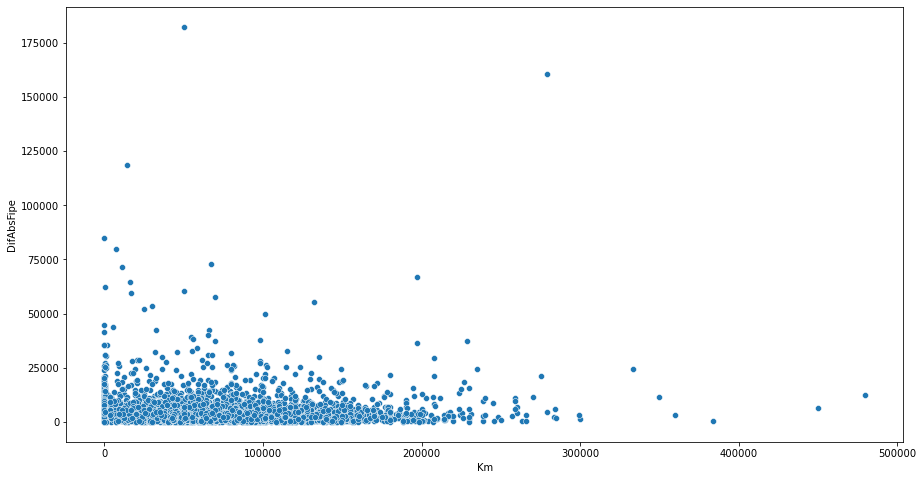

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Km', y='DifFipe', data=df[df['Km']<500000]);

plt.figure(figsize=(15,8))
sns.scatterplot(x='Km', y='DifAbsFipe', data=df[df['Km']<500000]);

Os erros parecem menores à medida em que a quilometragem do veículo aumenta.

## Fipe versus KmPorDias

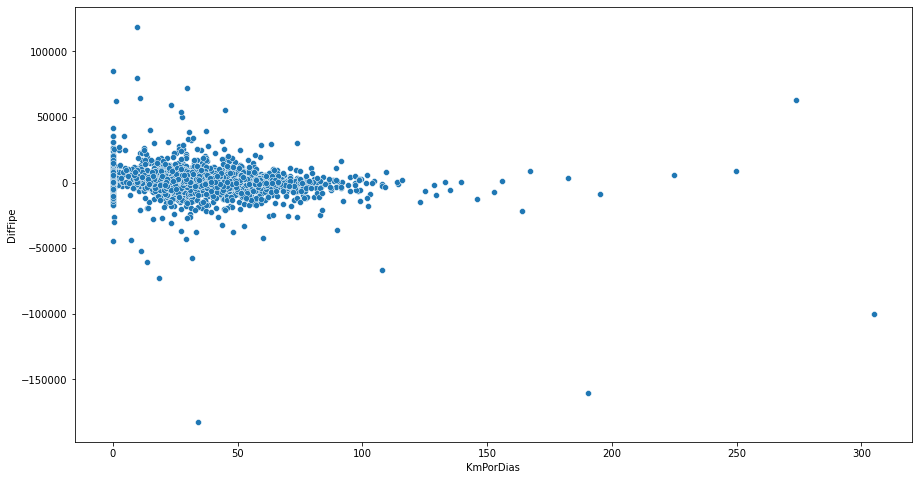

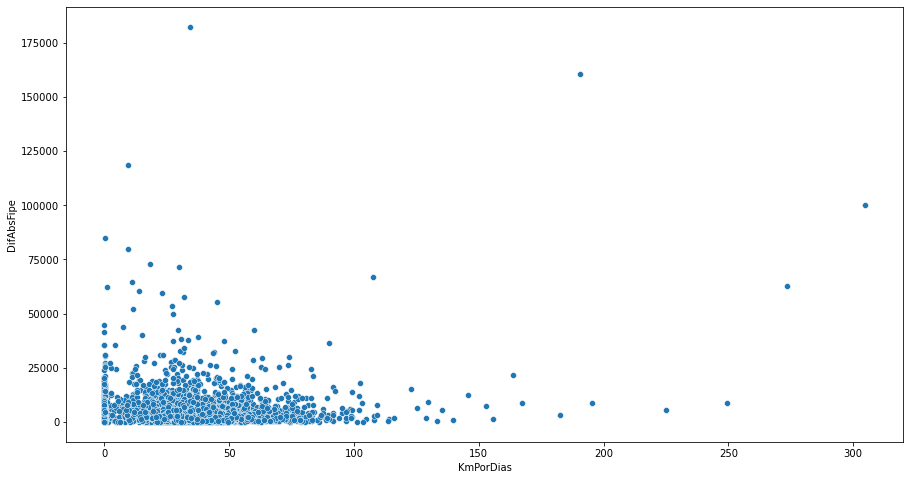

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='KmPorDias', y='DifFipe', data=df);

plt.figure(figsize=(15,8))
sns.scatterplot(x='KmPorDias', y='DifAbsFipe', data=df);

## Fipe versus Ano

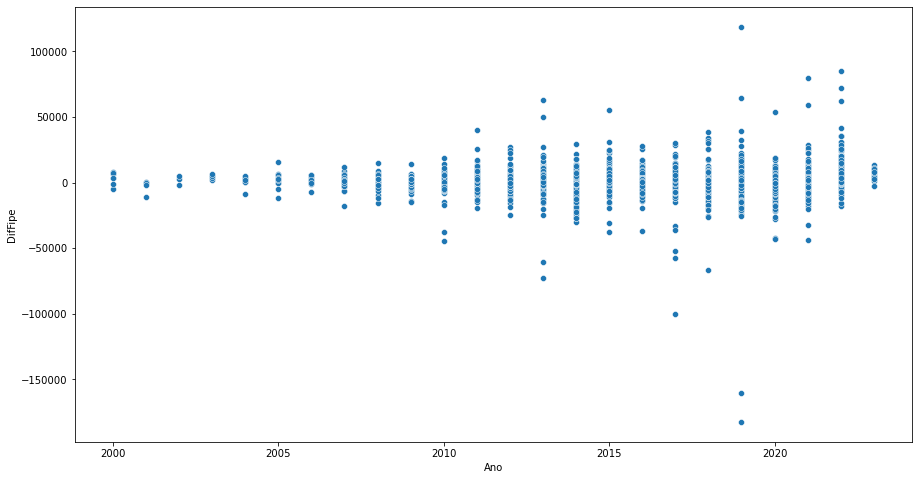

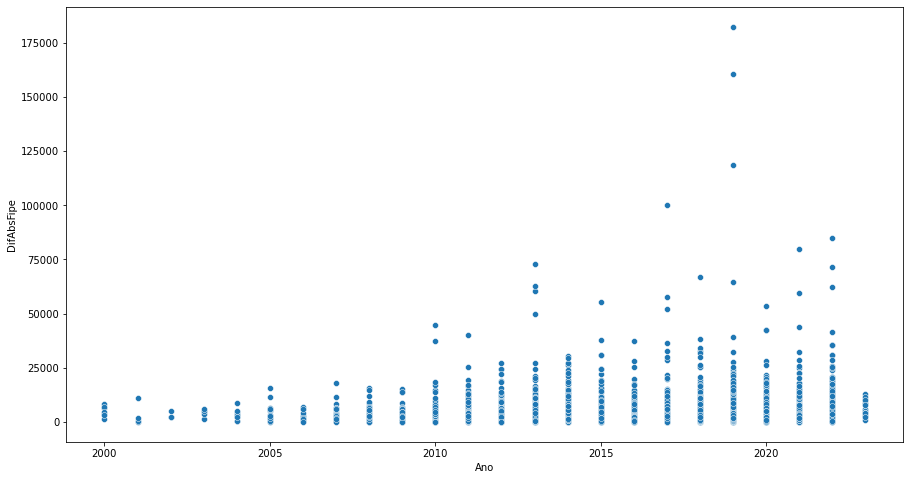

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Ano', y='DifFipe', data=df);

plt.figure(figsize=(15,8))
sns.scatterplot(x='Ano', y='DifAbsFipe', data=df);

In [19]:
ano_v_fipe = df.groupby('Ano')[['Preco', 'PrecoFipe', 'DifFipe', 'DifAbsFipe']].mean()
ano_v_fipe['DifPercentual'] = ano_v_fipe['DifAbsFipe']/ano_v_fipe['Preco']

ano_v_fipe.sort_values('DifPercentual', ascending=False)

,Preco,PrecoFipe,DifFipe,DifAbsFipe,DifPercentual
Ano,,,,,
2000,23770.000000,20569.857143,3200.142857,4941.857143,0.207903
2001,16675.000000,20058.250000,-3383.250000,3429.250000,0.205652
2005,28669.214286,26221.214286,2448.000000,4924.142857,0.171757
2002,19100.000000,17348.666667,1751.333333,3235.333333,0.169389
2003,32138.000000,27892.400000,4245.600000,4245.600000,0.132105
2010,40020.979592,39125.030612,895.948980,4776.418367,0.119348
2004,29514.545455,27705.545455,1809.000000,3395.909091,0.115059
2008,37654.545455,36276.927273,1377.618182,3987.145455,0.105887
2007,36818.966667,35921.833333,897.133333,3863.333333,0.104928


Embora as diferenças absolutas observadas entre tabela Fipe e valor do carro aumentem quanto mais atual é o modelo, as diferenças percentuais são mais acentuadas para os veículos mais antigos. É importante observar que os carros mais recentes também costumam ser os mais caros e, portanto, é natural esperar que a diferença absoluta de valores em comparação com a tabela Fipe também seja maior.

## Fipe versus Combustível

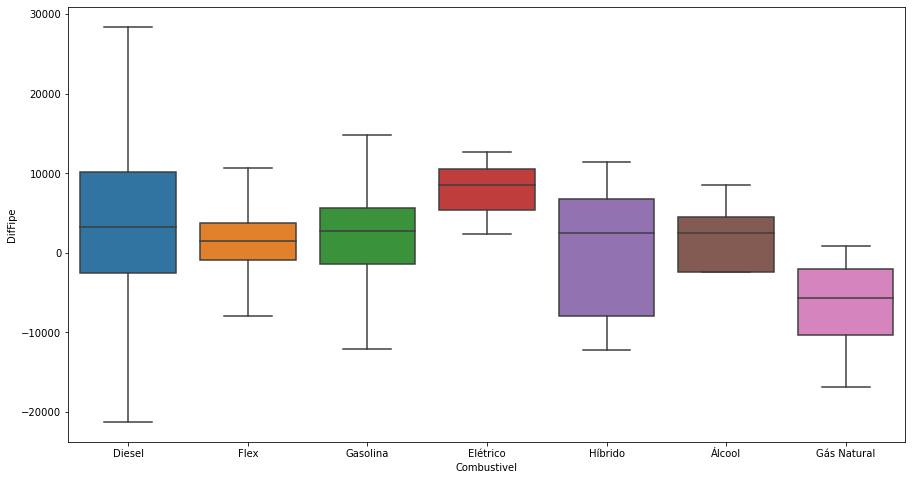

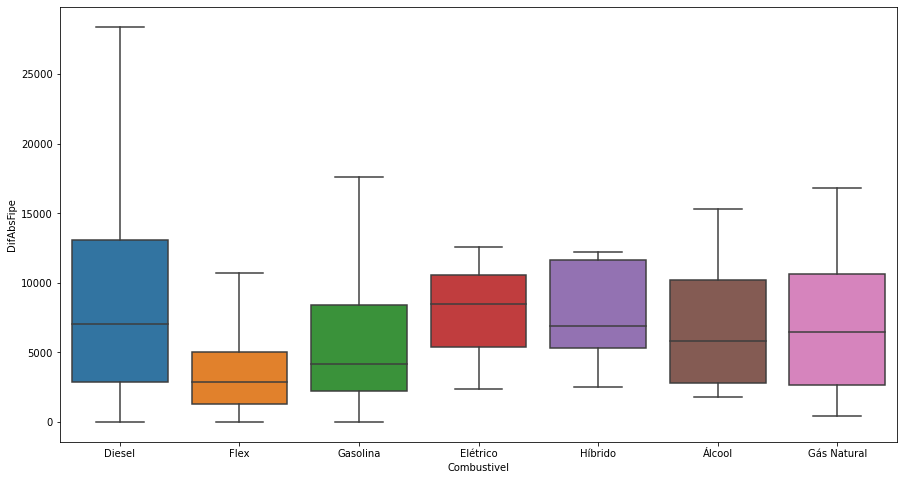

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Combustivel'],y=df['DifFipe'], showfliers=False);

plt.figure(figsize=(15,8))
sns.boxplot(x=df['Combustivel'],y=df['DifAbsFipe'], showfliers=False);

In [21]:
combustivel_v_fipe = df.groupby('Combustivel')[['Preco', 'PrecoFipe', 'DifFipe', 'DifAbsFipe']].mean()
combustivel_v_fipe['DifPercentual'] = combustivel_v_fipe['DifAbsFipe']/combustivel_v_fipe['Preco']

combustivel_v_fipe.sort_values('DifPercentual', ascending=False)

,Preco,PrecoFipe,DifFipe,DifAbsFipe,DifPercentual
Combustivel,,,,,
Gás Natural,54948.000000,56347.461538,-1399.461538,11221.923077,0.204228
Álcool,49217.500000,49665.750000,-448.250000,7190.750000,0.146101
Gasolina,107717.011364,104951.309659,2765.701705,7495.815341,0.069588
Diesel,175314.857143,172637.988290,2676.868852,10499.533958,0.059890
Flex,71029.110761,69847.565019,1181.545741,3992.220820,0.056205
Híbrido,179804.428571,179870.571429,-66.142857,7923.857143,0.044069
Elétrico,243376.666667,235565.666667,7811.000000,7811.000000,0.032094


## Fipe versus Direcao

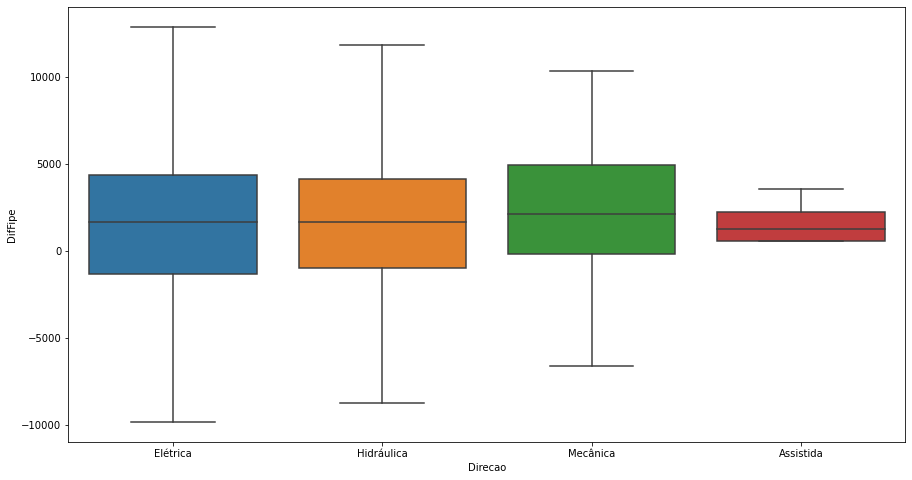

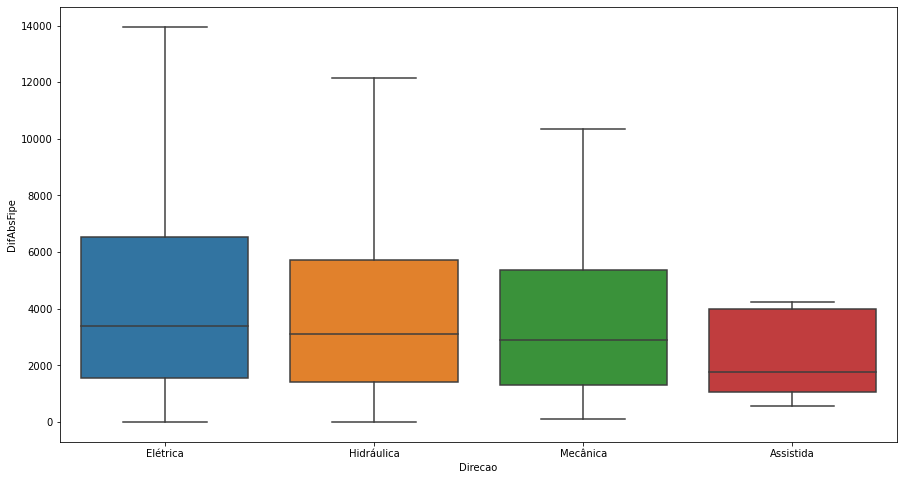

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Direcao'],y=df['DifFipe'], showfliers=False);

plt.figure(figsize=(15,8))
sns.boxplot(x=df['Direcao'],y=df['DifAbsFipe'], showfliers=False);

In [23]:
direcao_v_fipe = df.groupby('Direcao')[['Preco', 'PrecoFipe', 'DifFipe', 'DifAbsFipe']].mean()
direcao_v_fipe['DifPercentual'] = direcao_v_fipe['DifAbsFipe']/direcao_v_fipe['Preco']

direcao_v_fipe.sort_values('DifPercentual', ascending=False)

,Preco,PrecoFipe,DifFipe,DifAbsFipe,DifPercentual
Direcao,,,,,
Mecânica,56463.923077,55276.946154,1186.976923,5150.453846,0.091217
Hidráulica,79293.707052,77770.683544,1523.023508,5090.908680,0.064203
Elétrica,102677.450575,101191.557854,1485.892720,5203.154023,0.050675
Assistida,132481.416667,130134.833333,2346.583333,3701.416667,0.027939


## Fipe versus NumOpcionais

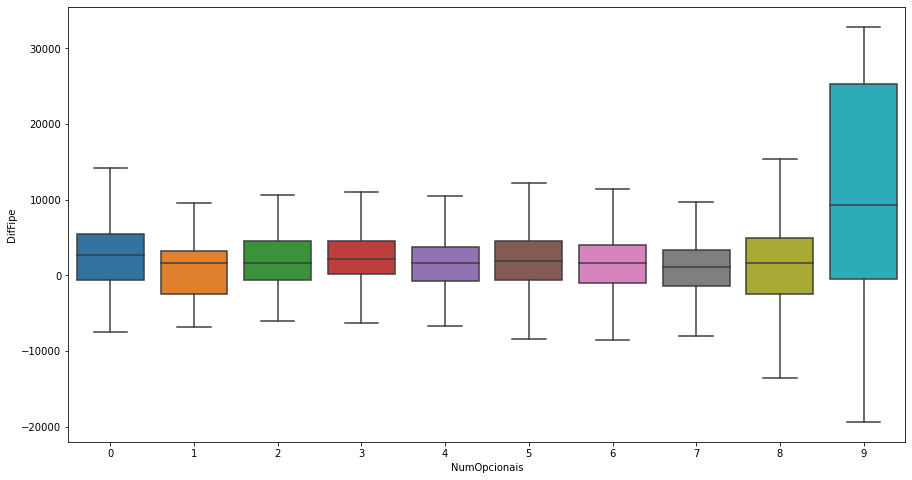

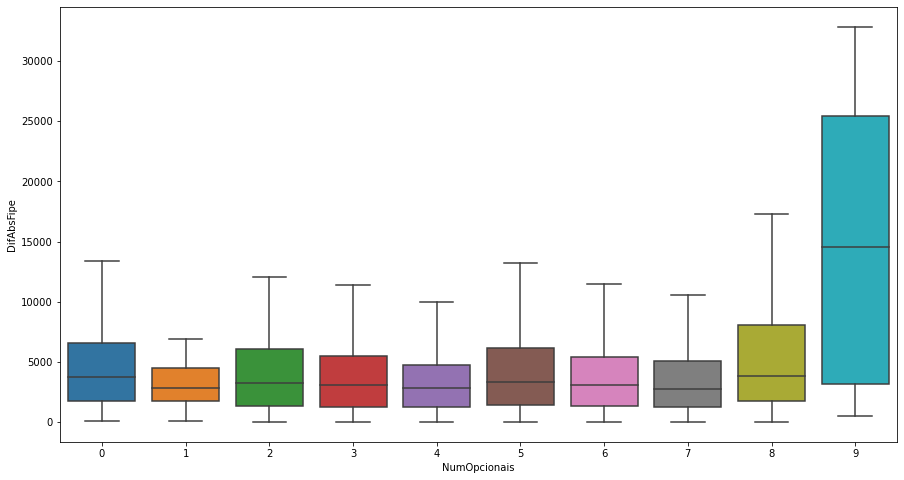

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['NumOpcionais'],y=df['DifFipe'], showfliers=False);

plt.figure(figsize=(15,8))
sns.boxplot(x=df['NumOpcionais'],y=df['DifAbsFipe'], showfliers=False);

In [25]:
opcionais_v_fipe = df.groupby('NumOpcionais')[['Preco', 'PrecoFipe', 'DifFipe', 'DifAbsFipe']].mean()
opcionais_v_fipe['DifPercentual'] = opcionais_v_fipe['DifAbsFipe']/opcionais_v_fipe['Preco']

opcionais_v_fipe.sort_values('DifPercentual', ascending=False)

,Preco,PrecoFipe,DifFipe,DifAbsFipe,DifPercentual
NumOpcionais,,,,,
9,171633.333333,162036.428571,9596.904762,18752.333333,0.109258
2,79896.197802,77306.670330,2589.527473,5815.967033,0.072794
3,82273.276382,80321.994975,1951.281407,5336.959799,0.064869
6,70789.649924,69572.345510,1217.304414,4549.840183,0.064273
5,79928.623794,77895.284566,2033.339228,5044.294212,0.063110
0,83632.396429,80907.410714,2724.985714,5231.735714,0.062556
8,121849.761456,120798.603774,1051.157682,6701.710243,0.055000
4,74977.670507,73542.753456,1434.917051,3991.520737,0.053236
7,79911.298214,79223.392857,687.905357,4111.019643,0.051445


Existe uma diferença maior quando o veículo possui 9 items opcionais (em geral devido ao fato do carro ser blindado).

## Fipe versus UF

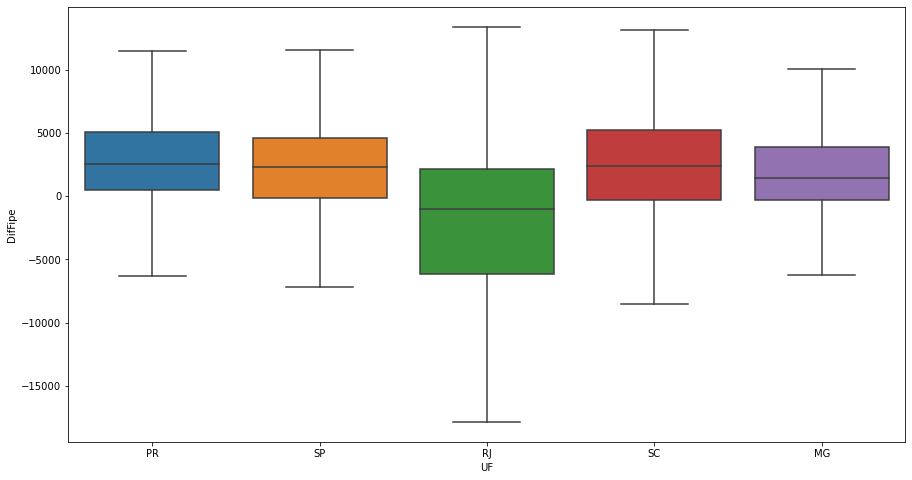

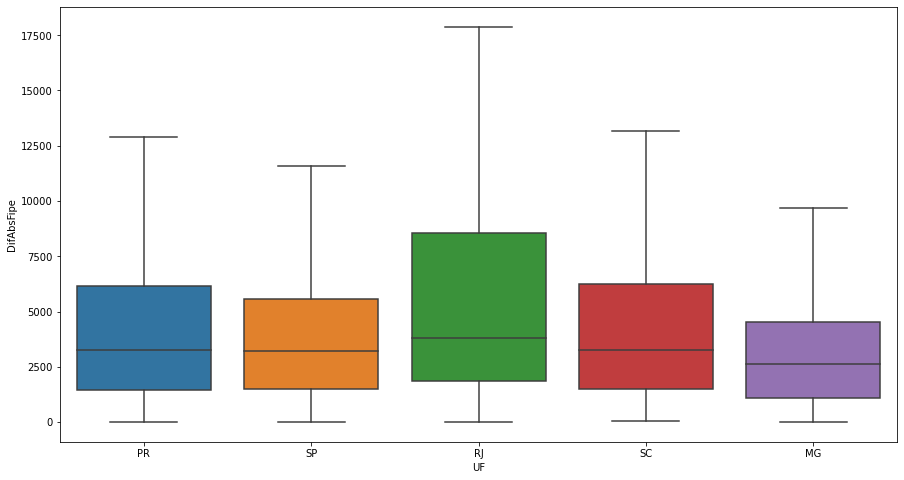

In [26]:
top_5 = df['UF'].value_counts()[:5].index

plt.figure(figsize=(15,8))
sns.boxplot(x=df.loc[df['UF'].isin(top_5)]['UF'],y=df['DifFipe'], showfliers=False);

plt.figure(figsize=(15,8))
sns.boxplot(x=df.loc[df['UF'].isin(top_5)]['UF'],y=df['DifAbsFipe'], showfliers=False);

In [27]:
uf_v_fipe = df.groupby('UF')[['Preco', 'PrecoFipe', 'DifFipe', 'DifAbsFipe']].mean()
uf_v_fipe['DifPercentual'] = uf_v_fipe['DifAbsFipe']/uf_v_fipe['Preco']

uf_v_fipe.sort_values('DifPercentual', ascending=False)

,Preco,PrecoFipe,DifFipe,DifAbsFipe,DifPercentual
UF,,,,,
RR,83445.000000,93632.000000,-10187.000000,15208.333333,0.182256
AM,63161.000000,64825.344828,-1664.344828,7759.586207,0.122854
RJ,76802.696275,78417.286533,-1614.590258,6662.985673,0.086755
MS,95822.142857,99123.857143,-3301.714286,7999.428571,0.083482
BA,88270.263889,89832.902778,-1562.638889,5685.388889,0.064409
RO,98098.750000,92370.375000,5728.375000,6270.875000,0.063924
RS,88869.994253,84779.534483,4090.459770,5664.804598,0.063743
PA,78453.191489,76870.276596,1582.914894,4961.680851,0.063244
SP,84372.563243,82378.144865,1994.418378,5212.814054,0.061783


A Fipe parece errar mais em carros vendidos no estado do Rio de Janeiro.

## Fipe versus Potência

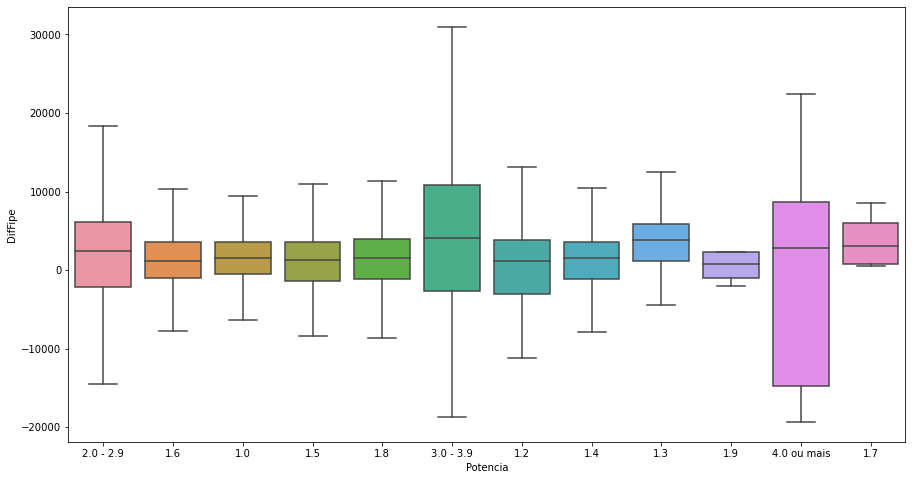

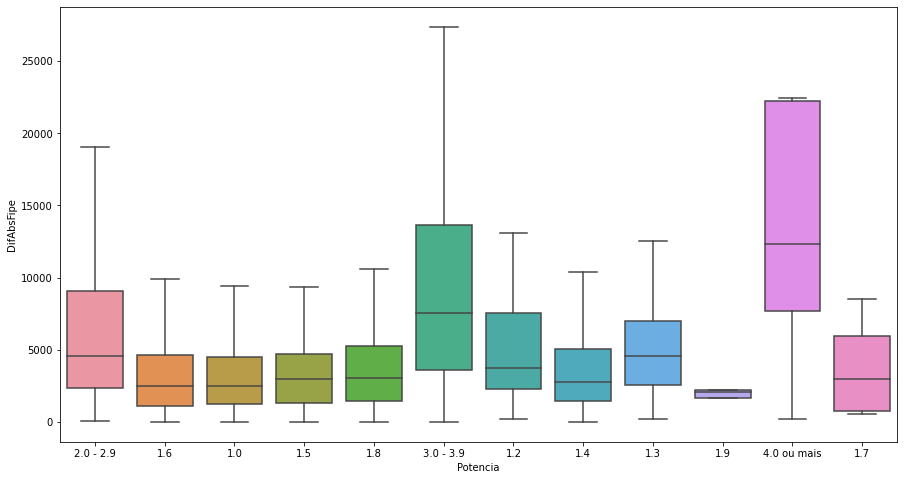

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Potencia'],y=df['DifFipe'], showfliers=False);

plt.figure(figsize=(15,8))
sns.boxplot(x=df['Potencia'],y=df['DifAbsFipe'], showfliers=False);

In [29]:
potencia_v_fipe = df.groupby('Potencia')[['Preco', 'PrecoFipe', 'DifFipe', 'DifAbsFipe']].mean()
potencia_v_fipe['DifPercentual'] = potencia_v_fipe['DifAbsFipe']/potencia_v_fipe['Preco']

potencia_v_fipe.sort_values('DifPercentual', ascending=False)

,Preco,PrecoFipe,DifFipe,DifAbsFipe,DifPercentual
Potencia,,,,,
4.0 ou mais,231286.666667,239471.333333,-8184.666667,21012.333333,0.090850
1.7,47300.000000,43535.500000,3764.500000,3764.500000,0.079588
1.3,94489.149254,89446.582090,5042.567164,6902.865672,0.073055
3.0 - 3.9,157084.253333,153478.820000,3605.433333,10280.580000,0.065446
1.4,68359.039437,67472.461972,886.577465,4340.008451,0.063488
1.0,60880.691600,59536.344074,1344.347526,3720.211738,0.061107
2.0 - 2.9,127713.026997,125550.025872,2163.001125,7610.623172,0.059592
1.6,64197.077033,63195.845934,1001.231098,3644.101284,0.056764
1.8,78908.900783,77876.973890,1031.926893,4085.566580,0.051776


A Fipe parece errar mais em carros mais potentes.

# Nova rodada de Feature Engineering

Nessa etapa, serão criadas novas features com base nas distorções observadas na Tabela Fipe, nos dados de treinamento.

In [30]:
from sklearn.model_selection import train_test_split

y = df['Preco']
X_train, X_test, y_train, y_test = train_test_split(df.drop('Preco', axis=1), y, test_size=0.3, random_state=42)

In [31]:
# Utilizado para o Streamlit

# def gerador_de_features_tabelado(var):
#     var_v_fipe = X_train.groupby(var)[['PrecoFipe', 'DifFipe']].mean()
#     var_v_fipe['DifPercentual'] = var_v_fipe['DifFipe']/var_v_fipe['PrecoFipe']
    
#     name = var.lower()+'_v_fipe.json'
#     return var_v_fipe.to_json('json/'+name)

# gerador_de_features_tabelado('Marca')
# gerador_de_features_tabelado('Tipo')
# gerador_de_features_tabelado('Ano')
# gerador_de_features_tabelado('Potencia')
# gerador_de_features_tabelado('NumOpcionais')
# gerador_de_features_tabelado('Combustivel')
# gerador_de_features_tabelado('Direcao')
# gerador_de_features_tabelado('UF')

In [32]:
def gerador_de_features(x, var):
    var_v_fipe = X_train.groupby(var)[['PrecoFipe', 'DifFipe']].mean()
    var_v_fipe['DifPercentual'] = var_v_fipe['DifFipe']/var_v_fipe['PrecoFipe']
    value = var_v_fipe.loc[x[var]]['DifPercentual']
    
    return value

In [33]:
df['DifMarca'] = df.apply(lambda x: gerador_de_features(x, 'Marca'), axis=1)
df['DifTipo'] = df.apply(lambda x: gerador_de_features(x, 'Tipo'), axis=1)
df['DifAno'] = df.apply(lambda x: gerador_de_features(x, 'Ano'), axis=1)
df['DifPotencia'] = df.apply(lambda x: gerador_de_features(x, 'Potencia'), axis=1)
df['DifNumOpcionais'] = df.apply(lambda x: gerador_de_features(x, 'NumOpcionais'), axis=1)
df['DifCombustivel'] = df.apply(lambda x: gerador_de_features(x, 'Combustivel'), axis=1)
df['DifDirecao'] = df.apply(lambda x: gerador_de_features(x, 'Direcao'), axis=1)
df['DifUF'] = df.apply(lambda x: gerador_de_features(x, 'UF'), axis=1)
df['PrecoFipeLog'] = np.log(df['PrecoFipe'])
df['PrecoFipeAjustado'] = df['PrecoFipe']*(1+df['DifMarca']+df['DifTipo']+df['DifAno']+df['DifPotencia']+df['DifNumOpcionais']+df['DifCombustivel']+df['DifDirecao']+df['DifUF'])
df['KmSqrtPorDias'] = df['KmSqrt']/df['Dias']

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustivel,Cambio,Direcao,...,DifTipo,DifAno,DifPotencia,DifNumOpcionais,DifCombustivel,DifDirecao,DifUF,PrecoFipeLog,PrecoFipeAjustado,KmSqrtPorDias
0,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,2.0 - 2.9,Diesel,Automático,Elétrica,...,0.010805,0.016612,0.018689,0.008846,0.019795,0.013335,0.017917,11.844902,155478.083992,0.000000
1,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,0.025831,0.004448,0.015697,0.016420,0.016763,0.021330,0.049212,10.710722,52338.210932,0.000304
3,VW - VOLKSWAGEN,VW - VOLKSWAGEN POLO COMFORT. 200 TSI 1.0 FLEX...,Hatch,2021,PR,11139,1.0,Flex,Automático,Hidráulica,...,0.018921,0.005492,0.020786,0.016420,0.016763,0.021330,0.039465,11.426376,106093.860627,0.143986
4,HYUNDAI,HYUNDAI HB20S VISION 1.6 FLEX 16V AUT,Sedã,2021,CE,25223,1.6,Flex,Automático,Hidráulica,...,0.014503,0.005492,0.015697,0.006772,0.016763,0.021330,0.008263,11.304276,89837.454874,0.216668
5,VW - VOLKSWAGEN,VW - VOLKSWAGEN NIVUS COMFORTLINE 1.0 200 TSI ...,SUV,2022,PR,8,1.0,Flex,Manual,Elétrica,...,0.010805,0.057673,0.020786,0.037736,0.016763,0.013335,0.039465,11.660699,140760.735689,0.007686


# Dividindo a base de dados

Como primeiro passo, a variável alvo será separada da base de dados, que por sua vez será dividida entre amostras de treino (aproximadamente 70% das observações), validação (15% das observações) e teste (15% das observações). A feature `Descricao` será eliminada do dataset por não ser muito informativa.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3659 entries, 0 to 5163
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Marca              3659 non-null   object 
 1   Descricao          3659 non-null   object 
 2   Tipo               3659 non-null   object 
 3   Ano                3659 non-null   int64  
 4   UF                 3659 non-null   object 
 5   Km                 3659 non-null   int64  
 6   Potencia           3659 non-null   object 
 7   Combustivel        3659 non-null   object 
 8   Cambio             3659 non-null   object 
 9   Direcao            3659 non-null   object 
 10  Cor                3659 non-null   object 
 11  FinalDePlaca       3659 non-null   int64  
 12  Portas             3659 non-null   object 
 13  UnicoDono          3659 non-null   object 
 14  AceitaTrocas       3659 non-null   object 
 15  ArCondicionado     3659 non-null   bool   
 16  AirBag             3659 

In [35]:
from sklearn.model_selection import train_test_split

y = df['Preco']

X_train, X_test, y_train, y_test = train_test_split(df[['UF', 'Km', 'Combustivel', 'Cambio', 'Direcao', 'Cor', 
                                                        'FinalDePlaca', 'UnicoDono', 'AceitaTrocas', 'ArCondicionado', 
                                                        'AirBag', 'Alarme', 'TravaEletrica', 'VidroEletrico', 'Som', 
                                                        'SensorDeRe', 'CameraDeRe', 'Blindado', 'KmPorDias', 
                                                        'NumOpcionais', 'KmSqrt', 'PotenciaNum', 'PrecoFipe','DifMarca', 
                                                        'DifTipo', 'DifAno', 'DifPotencia', 'DifNumOpcionais', 
                                                        'DifCombustivel', 'DifDirecao', 'DifUF', 'PrecoFipeLog', 
                                                        'PrecoFipeAjustado', 'KmSqrtPorDias']], 
                                                    y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

len(X_train), len(X_valid), len(X_test)

(2561, 549, 549)

# Estabelecendo o benchmark: Tabela Fipe

O objetivo desse projeto é desenvolver um modelo capaz de oferecer estimativas de preços mais realistas do que aquelas fornecidas pela Tabela Fipe, baseadas no que está sendo de fato praticado no mercado e levando em consideração mais variáveis do que a tabela de consulta padrão para compra e venda de automóveis.

As métricas de avaliação consideradas nesse projeto serão três: RMSE, MAPE e RMSLE.

- **RMSE**: essa é uma das métricas mais populares, que penaliza os erros maiores. Tem como grande vantagem reportar um erro na unidade da variável dependente, sendo esse de fácil interpretação. Ou seja, para o caso avaliado, a métrica RMSE apresentará um erro em termos de reais (R\$);


- **MAPE**: essa métrica calcula o erro em termos de uma porcentagem em relação ao valor real. Ela também é fácil de se interpretar e não depende da escala dos valores;


- **RMSLE**: essa métrica aplica o log aos valores real e predito antes de registrar suas diferenças. Isso a torna robusta a outliers. No entanto, a subestimação é mais penalizada que a sobrestimação dos valores.

In [36]:
df_metricas = pd.DataFrame(columns=['Modelo', 'RMSE', 'MAPE', 'RMSLE'])

df_metricas

,Modelo,RMSE,MAPE,RMSLE


In [37]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error

rmse  = mean_squared_error(y_valid, X_valid['PrecoFipe'], squared=False)
mape  = mean_absolute_percentage_error(y_valid, X_valid['PrecoFipe'])
rmsle = mean_squared_log_error(y_valid, X_valid['PrecoFipe'], squared=False)

df_metricas = df_metricas.append({'Modelo': 'Tabela Fipe',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193


# Encode das variáveis categóricas

As variáveis categóricas e binárias devem passar por um processo de encode adequado antes de serem oferecidas ao modelo de Machine Learning. Para as variáveis multicategóricas nominais, será aplicado o One Hot Encoder. Para as variáveis multicategóricas ordinais, será utilizado o One Hot Encoder. Por fim, para as variáveis com duas categorias e binárias, os valores serão convertidos de forma manual.

## One Hot Encoder

In [38]:
var_ohe = ['UF', 'Combustivel', 'Cambio', 'Direcao', 'Cor']

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
df_ohe = pd.DataFrame(ohe.fit_transform(X_train[var_ohe]).toarray(), columns=ohe.get_feature_names_out(), index=X_train.index)

X_train = X_train.join(df_ohe)
X_train = X_train.drop(var_ohe, axis=1)

X_train.head()

,Km,FinalDePlaca,UnicoDono,AceitaTrocas,ArCondicionado,AirBag,Alarme,TravaEletrica,VidroEletrico,Som,...,Cor_Amarelo,Cor_Azul,Cor_Branco,Cor_Cinza,Cor_Laranja,Cor_Outra,Cor_Prata,Cor_Preto,Cor_Verde,Cor_Vermelho
695,77200,9,Não,Sim,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5093,266000,3,Não,Sim,True,True,True,True,True,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,95000,8,Sim,Sim,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4077,259000,7,Não,Sim,True,True,True,True,True,True,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5089,149791,0,Não,Sim,True,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
df_ohe = pd.DataFrame(ohe.transform(X_valid[var_ohe]).toarray(), columns=ohe.get_feature_names_out(), index=X_valid.index)

X_valid = X_valid.join(df_ohe)
X_valid = X_valid.drop(var_ohe, axis=1)

df_ohe = pd.DataFrame(ohe.transform(X_test[var_ohe]).toarray(), columns=ohe.get_feature_names_out(), index=X_test.index)

X_test = X_test.join(df_ohe)
X_test = X_test.drop(var_ohe, axis=1)

## Encoder Manual

### Features booleanas

In [40]:
var_bool = X_train.select_dtypes('bool').columns

X_train[var_bool] = X_train[var_bool].astype('int64')
X_valid[var_bool] = X_valid[var_bool].astype('int64')
X_test[var_bool] = X_test[var_bool].astype('int64')

X_train[var_bool].head()

,ArCondicionado,AirBag,Alarme,TravaEletrica,VidroEletrico,Som,SensorDeRe,CameraDeRe,Blindado
695,1,0,0,0,0,0,0,0,0
5093,1,1,1,1,1,0,1,0,0
501,0,0,0,0,0,0,0,0,0
4077,1,1,1,1,1,1,0,1,0
5089,1,1,1,1,1,1,1,0,0


### Features com duas categorias

In [41]:
X_train['UnicoDono'] = X_train['UnicoDono'].replace({'Sim': 1, 'Não': 0})
X_valid['UnicoDono'] = X_valid['UnicoDono'].replace({'Sim': 1, 'Não': 0})
X_test['UnicoDono'] = X_test['UnicoDono'].replace({'Sim': 1, 'Não': 0})

In [42]:
X_train['AceitaTrocas'] = X_train['AceitaTrocas'].replace({'Sim': 1, 'Não': 0})
X_valid['AceitaTrocas'] = X_valid['AceitaTrocas'].replace({'Sim': 1, 'Não': 0})
X_test['AceitaTrocas'] = X_test['AceitaTrocas'].replace({'Sim': 1, 'Não': 0})

In [43]:
X_train.head()

,Km,FinalDePlaca,UnicoDono,AceitaTrocas,ArCondicionado,AirBag,Alarme,TravaEletrica,VidroEletrico,Som,...,Cor_Amarelo,Cor_Azul,Cor_Branco,Cor_Cinza,Cor_Laranja,Cor_Outra,Cor_Prata,Cor_Preto,Cor_Verde,Cor_Vermelho
695,77200,9,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5093,266000,3,0,1,1,1,1,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,95000,8,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4077,259000,7,0,1,1,1,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5089,149791,0,0,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2561 entries, 695 to 4483
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Km                       2561 non-null   int64  
 1   FinalDePlaca             2561 non-null   int64  
 2   UnicoDono                2561 non-null   int64  
 3   AceitaTrocas             2561 non-null   int64  
 4   ArCondicionado           2561 non-null   int64  
 5   AirBag                   2561 non-null   int64  
 6   Alarme                   2561 non-null   int64  
 7   TravaEletrica            2561 non-null   int64  
 8   VidroEletrico            2561 non-null   int64  
 9   Som                      2561 non-null   int64  
 10  SensorDeRe               2561 non-null   int64  
 11  CameraDeRe               2561 non-null   int64  
 12  Blindado                 2561 non-null   int64  
 13  KmPorDias                2561 non-null   float64
 14  NumOpcionais          

# Modelos com alto poder preditivo

In [45]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [46]:
y_pred = dtr.predict(X_train)

rmse  = mean_squared_error(y_train, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_train, y_pred)
rmsle = mean_squared_log_error(y_train, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'DecisionTreeRegressor (Treino)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000


A métrica acima indica que o modelo sofre de overfitting, ou seja, foi ajustado de forma com que descreve muito bem os dados usados para seu treinamento, mas tem pouca capacidade de generalização frente a dados nunca vistos antes. Duas soluções comuns para esse problema seriam coletar mais dados ou selecionar as features existentes. Nesse trabalho, no entanto, nosso primeiro passo será ajustar o valor de alguns hiperparâmetros do modelo, que podem reduzir o overfitting.

- `max_depth`: indica a profundidade da árvore de decisão. Talvez seja o parâmetro mais crítico, dado que seu valor padrão **None** permite que a árvore cresça até que as folhas sejam puras (um único exemplo) ou possuam um número menor de amostras do que aquele definido por `min_samples_split`, que por padrão são duas amostras;


- `min_samples_split`: conforme explicado acima, é o número mínimo de amostras necessárias para se dividir um nó.

In [47]:
dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [48]:
y_pred = dtr.predict(X_train)

rmse  = mean_squared_error(y_train, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_train, y_pred)
rmsle = mean_squared_log_error(y_train, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'DecisionTreeRegressor (Treino)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513


In [49]:
y_pred = dtr.predict(X_valid)

rmse  = mean_squared_error(y_valid, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_valid, y_pred)
rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'DecisionTreeRegressor (Validação)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326


A escolha dos hiperparâmetros reduziu o overfitting, mas não foi capaz de eliminá-lo. Ao invés de realizar um "fine-tuning" de hiperparâmetros, será optado por utilizar um modelo mais complexo, um ensemble do tipo bagging composto por diversas árvores de decisão: o modelo de Random Forests.

Será ajustado apenas um hiperparâmetro adicional:

- `max_features`: determina o número de features consideradas quando olhando para a melhor divisão da base de dados. Valores entre 30 e 50% do número total de features podem gerar árvores mais distintas e, por consequência, diminuir a probabilidade de overfitting do modelo.

In [50]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10, min_samples_split=5, max_features=0.5, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_split=5,
                      random_state=42)

In [51]:
y_pred = rfr.predict(X_train)

rmse  = mean_squared_error(y_train, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_train, y_pred)
rmsle = mean_squared_log_error(y_train, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'RandomForestRegressor (Treino)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691


In [52]:
y_pred = rfr.predict(X_valid)

rmse  = mean_squared_error(y_valid, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_valid, y_pred)
rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'RandomForestRegressor (Validação)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765


In [53]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [54]:
y_pred = xgb.predict(X_train)

rmse  = mean_squared_error(y_train, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_train, y_pred)
rmsle = mean_squared_log_error(y_train, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'XGBRegressor (Treino)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916


In [55]:
y_pred = xgb.predict(X_valid)

rmse  = mean_squared_error(y_valid, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_valid, y_pred)
rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'XGBRegressor (Validação)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916
7,XGBRegressor (Validação),11861.602675,0.086369,0.150938


Para reduzir o overfitting no modelo XGBoost, os seguintes parâmetros serão ajustados:

- `colsample_bytree`: determina o número de features utilizadas (similar ao hiperparâmetro `max_features` das Random Forests). Uma proporção menor ajuda a reduzir o overfitting;


- `subsample`: determina o número de instâncias de treinamento utilizadas. Uma taxa menor ajudar a reduzir o overfitting;


- `max_depth`: determina a profundidade máxima da árvore, onde valores menores ajudam a reduzir o overfitting.

In [56]:
xgb = XGBRegressor(colsample_bytree=0.8, subsample=0.7, max_depth=4, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [57]:
y_pred = xgb.predict(X_train)

rmse  = mean_squared_error(y_train, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_train, y_pred)
rmsle = mean_squared_log_error(y_train, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'XGBRegressor ajustado (Treino)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916
7,XGBRegressor (Validação),11861.602675,0.086369,0.150938
8,XGBRegressor ajustado (Treino),3792.352633,0.056024,0.097456


In [58]:
y_pred = xgb.predict(X_valid)

rmse  = mean_squared_error(y_valid, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_valid, y_pred)
rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'XGBRegressor ajustado (Validação)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916
7,XGBRegressor (Validação),11861.602675,0.086369,0.150938
8,XGBRegressor ajustado (Treino),3792.352633,0.056024,0.097456
9,XGBRegressor ajustado (Validação),12065.826346,0.087220,0.151045


# Regressão Quantílica

Em uma análise de um problema de regressão, tão importante quanto fornecer uma previsão numérica é expressar o quanto estamos confiantes naquela previsão. Nesse ponto, a **Regressão Quantílica** deve ser utilizada. O modelo de Random Forest baseado em regressão quantílica, por exemplo, nos permite estimar os valores para os quais exista determinada probabilidade do valor real ser maior ou menor que o estimado. Para isso, utilizaremos a biblioteca quantile-forest e o quantil de 50% para calcular as métricas do modelo, além dos quantis de 5% e 95% como limite inferior e limite superior de confiança, respectivamente.

In [59]:
from quantile_forest import RandomForestQuantileRegressor

rfqr = RandomForestQuantileRegressor(max_depth=10, min_samples_split=5, max_features=0.5, random_state=42)
rfqr.fit(X_train, y_train)

RandomForestQuantileRegressor(max_depth=10, max_features=0.5,
                              min_samples_split=5, random_state=42)

In [60]:
y_pred = rfqr.predict(X_train)

rmse  = mean_squared_error(y_train, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_train, y_pred)
rmsle = mean_squared_log_error(y_train, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'RandomForestQuantileRegressor (Treino)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916
7,XGBRegressor (Validação),11861.602675,0.086369,0.150938
8,XGBRegressor ajustado (Treino),3792.352633,0.056024,0.097456
9,XGBRegressor ajustado (Validação),12065.826346,0.087220,0.151045


In [61]:
y_pred = rfqr.predict(X_valid)

rmse  = mean_squared_error(y_valid, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_valid, y_pred)
rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'RandomForestQuantileRegressor (Validação)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916
7,XGBRegressor (Validação),11861.602675,0.086369,0.150938
8,XGBRegressor ajustado (Treino),3792.352633,0.056024,0.097456
9,XGBRegressor ajustado (Validação),12065.826346,0.087220,0.151045


# Busca em gride pelos melhores hiperparâmetros

Vamos agora realizar uma busca randômica em gride com validação cruzada para encontrar os melhores valores para os hiperparâmetros considerados anteriormente, além de um novo:

- `n_estimators`: determina o número de árvores de decisão consideradas no modelo. Um número maior possui diminui a probabilidade de overfitting.

In [62]:
X = pd.concat([X_train, X_valid, X_test]).sort_index()

X

,Km,FinalDePlaca,UnicoDono,AceitaTrocas,ArCondicionado,AirBag,Alarme,TravaEletrica,VidroEletrico,Som,...,Cor_Amarelo,Cor_Azul,Cor_Branco,Cor_Cinza,Cor_Laranja,Cor_Outra,Cor_Prata,Cor_Preto,Cor_Verde,Cor_Vermelho
0,0,0,0,1,1,1,1,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,9,0,1,1,1,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11139,3,1,1,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,25223,0,1,1,1,1,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,8,2,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5159,104000,2,1,1,1,1,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5160,122000,6,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5161,190000,2,1,1,1,0,0,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5162,122161,2,0,1,1,1,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'n_estimators'     : [100, 200, 300],
#               'max_features'     : [0.3, 0.5, 0.7],
#               'max_depth'        : [5, 10],
#               'min_samples_split': [3, 5]}

# rfqr = RandomForestQuantileRegressor(random_state=42)

# grid_search = GridSearchCV(estimator=rfqr, param_grid=param_grid, scoring='neg_root_mean_squared_error', 
#                                    verbose=3)
# grid_search.fit(X, y)
# grid_search.best_params_

A melhor combinação de parâmetros encontrada foi:

`n_estimators`: 300;

`min_samples_split`: 3;

`max_features`: 0.5;

`max_depth`: 10.

In [64]:
rfqr = RandomForestQuantileRegressor(n_estimators=300, max_depth=10, min_samples_split=3, max_features=0.5, random_state=42)
rfqr.fit(X_train, y_train)

RandomForestQuantileRegressor(max_depth=10, max_features=0.5,
                              min_samples_split=3, n_estimators=300,
                              random_state=42)

In [65]:
y_pred = rfqr.predict(X_train)

rmse  = mean_squared_error(y_train, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_train, y_pred)
rmsle = mean_squared_log_error(y_train, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'RandomForestQuantileRegressor c/ GridSearch (Treino)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916
7,XGBRegressor (Validação),11861.602675,0.086369,0.150938
8,XGBRegressor ajustado (Treino),3792.352633,0.056024,0.097456
9,XGBRegressor ajustado (Validação),12065.826346,0.087220,0.151045


In [66]:
y_pred = rfqr.predict(X_valid)

rmse  = mean_squared_error(y_valid, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_valid, y_pred)
rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'RandomForestQuantileRegressor c/ GridSearch (Validação)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916
7,XGBRegressor (Validação),11861.602675,0.086369,0.150938
8,XGBRegressor ajustado (Treino),3792.352633,0.056024,0.097456
9,XGBRegressor ajustado (Validação),12065.826346,0.087220,0.151045


# Avaliando o melhor modelo na base de teste

In [67]:
y_pred = rfqr.predict(X_test)

rmse  = mean_squared_error(y_test, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_test, y_pred)
rmsle = mean_squared_log_error(y_test, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'RandomForestQuantileRegressor (Teste)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916
7,XGBRegressor (Validação),11861.602675,0.086369,0.150938
8,XGBRegressor ajustado (Treino),3792.352633,0.056024,0.097456
9,XGBRegressor ajustado (Validação),12065.826346,0.087220,0.151045


# Avaliando a tabela Fipe na base de teste

In [68]:
y_pred_fipe = X_test['PrecoFipe']

rmse  = mean_squared_error(y_test, y_pred_fipe, squared=False)
mape  = mean_absolute_percentage_error(y_test, y_pred_fipe)
rmsle = mean_squared_log_error(y_test, y_pred_fipe, squared=False)

df_metricas = df_metricas.append({'Modelo': 'Tabela Fipe (Teste)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916
7,XGBRegressor (Validação),11861.602675,0.086369,0.150938
8,XGBRegressor ajustado (Treino),3792.352633,0.056024,0.097456
9,XGBRegressor ajustado (Validação),12065.826346,0.087220,0.151045


# Análise dos resultados

In [69]:
df_precos = pd.concat([y_test, 
                       X_test['PrecoFipe'], 
                       pd.Series(y_pred, name='PrecoModelo', index=y_test.index)], 
                      axis=1)

df_precos.head()

,Preco,PrecoFipe,PrecoModelo
1781,92900.0,108541.0,111900.0
1250,110990.0,107976.0,109900.0
676,74799.0,74904.0,74997.0
2998,138900.0,113498.0,127900.0
802,64900.0,62004.0,64900.0


In [70]:
df_precos['DifFipe'] = abs(df_precos['Preco']-df_precos['PrecoFipe'])
df_precos['DifModelo'] = abs(df_precos['Preco']-df_precos['PrecoModelo'])

df_precos.head()

,Preco,PrecoFipe,PrecoModelo,DifFipe,DifModelo
1781,92900.0,108541.0,111900.0,15641.0,19000.0
1250,110990.0,107976.0,109900.0,3014.0,1090.0
676,74799.0,74904.0,74997.0,105.0,198.0
2998,138900.0,113498.0,127900.0,25402.0,11000.0
802,64900.0,62004.0,64900.0,2896.0,0.0


In [71]:
(df_precos['DifFipe'].sum() - df_precos['DifModelo'].sum())

187321.19386677723

In [72]:
(df_precos['DifFipe'].sum() - df_precos['DifModelo'].sum())/len(df_precos)

341.2043604130733

Na base de teste, o modelo esteve em média **R\$ 341,20** mais próximo do valor anunciado em relação à tabela Fipe. Para uma base de 710 veículos, isso representou um ganho de impressionantes  **R\$ 187.321,19**!

In [73]:
y_pred = rfqr.predict(X_test, quantiles=[0.05, 0.5, 0.95])
df_pred = pd.DataFrame(y_pred, columns=['5%', '50%', '95%'], index=y_test.index)
df_pred = pd.concat([df_pred, y_test], axis=1)

df_pred.head()

,5%,50%,95%,Preco
1781,98800.0,111900.0,121853.376619,92900.0
1250,100280.0,109900.0,118900.000000,110990.0
676,69900.0,74997.0,80490.000000,74799.0
2998,92900.0,127900.0,149990.000000,138900.0
802,58900.0,64900.0,69990.000000,64900.0


In [74]:
df_pred['NoIntervalo'] = df_pred.apply(lambda x: True if x['5%'] <= x['Preco'] <= x['95%'] else False, axis=1)

df_pred.head()

,5%,50%,95%,Preco,NoIntervalo
1781,98800.0,111900.0,121853.376619,92900.0,False
1250,100280.0,109900.0,118900.000000,110990.0,True
676,69900.0,74997.0,80490.000000,74799.0,True
2998,92900.0,127900.0,149990.000000,138900.0,True
802,58900.0,64900.0,69990.000000,64900.0,True


In [75]:
df_pred['NoIntervalo'].sum()/df_pred['NoIntervalo'].count()

0.9089253187613844

Como pode ser visto acima, para **90% das observações** da base de validação os preços anunciados estavam **dentro dos intervalos** previstos.

In [76]:
df_pred['Dif5%'] = abs(df_pred['50%'] - df_pred['5%'])
df_pred['Dif95%'] = abs(df_pred['50%'] - df_pred['95%'])

y_error = np.transpose(df_pred[['Dif5%', 'Dif95%']].to_numpy())

y_error.shape

(2, 549)

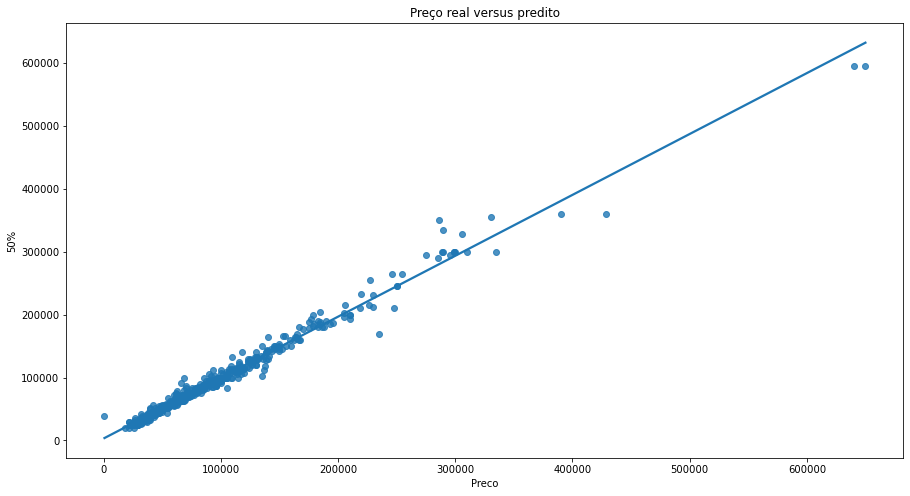

In [77]:
fig = plt.figure(figsize=(15,8))
sns.regplot(x='Preco', y='50%', data=df_pred, ci=None).set(title='Preço real versus predito');

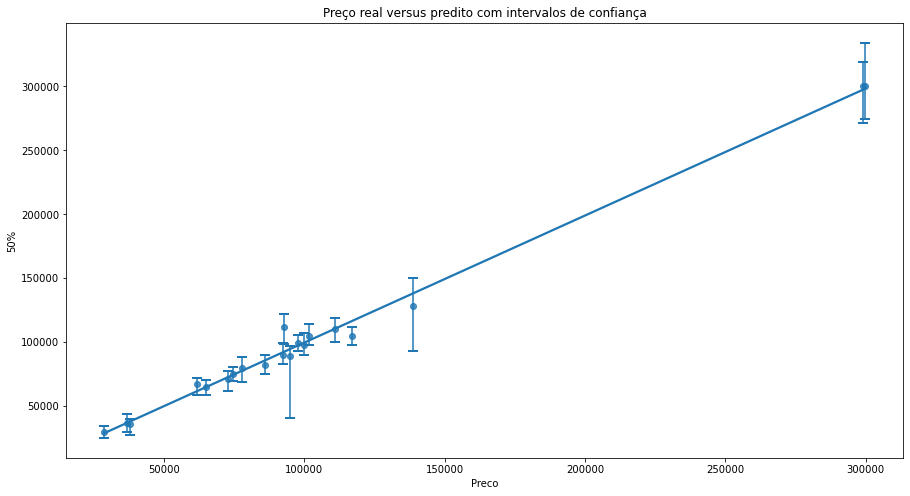

In [78]:
fig = plt.figure(figsize=(15,8))
ax = sns.regplot(x='Preco', y='50%', data=df_pred.iloc[0:20], ci=None);
ax.set(title='Preço real versus predito com intervalos de confiança')
ax.errorbar(x='Preco', y='50%', yerr=y_error[:,0:20], fmt='none', capsize=5, capthick=2, zorder=1, data=df_pred.iloc[0:20]);

# Features mais importantes para o modelo

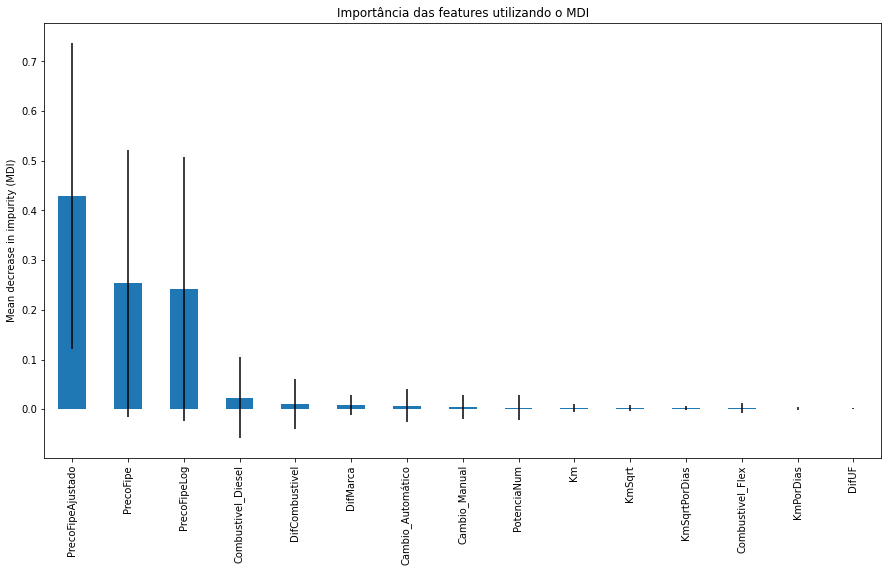

In [79]:
importances = rfqr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfqr.estimators_], axis=0)

forest_importances = pd.concat([pd.Series(importances, name='Valor', index=X_train.columns),
                                pd.Series(std, name= 'Std', index=X_train.columns)],axis=1)
forest_importances.sort_values('Valor', ascending=False, inplace=True)

top_15 = forest_importances.iloc[:15]

fig, ax = plt.subplots(figsize=(15,8))
top_15['Valor'].plot.bar(yerr=top_15['Std'], ax=ax)
ax.set_title("Importância das features utilizando o MDI");
ax.set_ylabel("Mean decrease in impurity (MDI)");

Conforme esperado, o preço da tabela Fipe possui a maior importância para o modelo. É interessante observar, no entanto, a presença entre as 15 features mais importantes para o modelo de algumas variáveis relacionadas à quilometragem do veículo (`KmPorDias`, `KmLimite`, `KmSqrt` e o próprio `Km`).

In [80]:
X_train[forest_importances.iloc[:15].index]

,PrecoFipeAjustado,PrecoFipe,PrecoFipeLog,Combustivel_Diesel,DifCombustivel,DifMarca,Cambio_Automático,Cambio_Manual,PotenciaNum,Km,KmSqrt,KmSqrtPorDias,Combustivel_Flex,KmPorDias,DifUF
695,37655.690327,32621.0,10.392712,0.0,0.016763,0.014693,0.0,1.0,1.0,77200,277.848880,0.094991,1.0,26.393162,0.008263
5093,135209.412414,111311.0,11.620083,1.0,0.019795,0.025140,1.0,0.0,3.5,266000,515.751878,0.128265,0.0,66.152698,0.039465
501,173209.615165,153509.0,11.941514,1.0,0.019795,0.034010,1.0,0.0,2.5,95000,308.220700,0.210533,0.0,64.890710,-0.020397
4077,147504.449192,125812.0,11.742544,1.0,0.019795,0.014693,1.0,0.0,2.5,259000,508.920426,0.139240,0.0,70.861833,0.039465
5089,57308.967062,49828.0,10.816332,0.0,0.019850,0.019294,1.0,0.0,2.5,149791,387.028423,0.081463,0.0,31.528310,0.039465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,103286.050451,89579.0,11.402876,0.0,0.016763,0.019294,1.0,0.0,1.8,65000,254.950976,0.099590,1.0,25.390625,0.026377
1842,103541.709752,88471.0,11.390430,1.0,0.019795,0.014693,0.0,1.0,2.5,105000,324.037035,0.088656,0.0,28.727770,0.039465
1240,121240.400258,106996.0,11.580547,0.0,0.016763,0.017677,1.0,0.0,1.0,31043,176.190238,0.160319,1.0,28.246588,0.017581
4966,31193.358468,27780.0,10.232072,0.0,0.016763,0.017074,0.0,1.0,1.0,152085,389.980769,0.096986,1.0,37.822681,-0.023120


In [81]:
rfqr = RandomForestQuantileRegressor(n_estimators=300, max_depth=10, min_samples_split=3, max_features=0.5, random_state=42)
rfqr.fit(X_train[forest_importances.iloc[:15].index], y_train)

RandomForestQuantileRegressor(max_depth=10, max_features=0.5,
                              min_samples_split=3, n_estimators=300,
                              random_state=42)

In [82]:
y_pred = rfqr.predict(X_train[forest_importances.iloc[:15].index])

rmse  = mean_squared_error(y_train, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_train, y_pred)
rmsle = mean_squared_log_error(y_train, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'RandomForestQuantileRegressor c/ Feature Selection (Treino)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916
7,XGBRegressor (Validação),11861.602675,0.086369,0.150938
8,XGBRegressor ajustado (Treino),3792.352633,0.056024,0.097456
9,XGBRegressor ajustado (Validação),12065.826346,0.087220,0.151045


In [83]:
y_pred = rfqr.predict(X_valid[forest_importances.iloc[:15].index])

rmse  = mean_squared_error(y_valid, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_valid, y_pred)
rmsle = mean_squared_log_error(y_valid, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'RandomForestQuantileRegressor c/ Feature Selection (Validação)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916
7,XGBRegressor (Validação),11861.602675,0.086369,0.150938
8,XGBRegressor ajustado (Treino),3792.352633,0.056024,0.097456
9,XGBRegressor ajustado (Validação),12065.826346,0.087220,0.151045


In [84]:
y_pred = rfqr.predict(X_test[forest_importances.iloc[:15].index])

rmse  = mean_squared_error(y_test, y_pred, squared=False)
mape  = mean_absolute_percentage_error(y_test, y_pred)
rmsle = mean_squared_log_error(y_test, y_pred, squared=False)

df_metricas = df_metricas.append({'Modelo': 'RandomForestQuantileRegressor c/ Feature Selection (Teste)',
                                  'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}, ignore_index=True)

df_metricas

,Modelo,RMSE,MAPE,RMSLE
0,Tabela Fipe,11388.497909,0.081253,0.145193
1,DecisionTreeRegressor (Treino),0.000000,0.000000,0.000000
2,DecisionTreeRegressor (Treino),5486.866964,0.041232,0.068513
3,DecisionTreeRegressor (Validação),13470.025684,0.096109,0.166326
4,RandomForestRegressor (Treino),5726.761940,0.059821,0.110691
5,RandomForestRegressor (Validação),11329.431902,0.080351,0.144765
6,XGBRegressor (Treino),1631.433415,0.022881,0.055916
7,XGBRegressor (Validação),11861.602675,0.086369,0.150938
8,XGBRegressor ajustado (Treino),3792.352633,0.056024,0.097456
9,XGBRegressor ajustado (Validação),12065.826346,0.087220,0.151045


# Avaliando as virtudes e fraquezas do modelo

Nessa etapa iremos avaliar se existem determinadas faixas de valores nas quais o modelo desenvolvido possui um desempenho particularmente superior ou inferior quando comparado à Tabela Fipe. Serão avaliadas as seguintes features: ano do modelo, quilometragem, número de opcionais e preço do veículo. 

In [85]:
df_comp = pd.concat([X_test, df_precos, df.loc[X_test.index]['Ano']], axis=1)

df_comp.head()

,Km,FinalDePlaca,UnicoDono,AceitaTrocas,ArCondicionado,AirBag,Alarme,TravaEletrica,VidroEletrico,Som,...,Cor_Prata,Cor_Preto,Cor_Verde,Cor_Vermelho,Preco,PrecoFipe,PrecoModelo,DifFipe,DifModelo,Ano
1781,230000,3,0,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,92900.0,108541.0,111900.0,15641.0,19000.0,2012
1250,54000,7,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,110990.0,107976.0,109900.0,3014.0,1090.0,2020
676,82480,0,0,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,74799.0,74904.0,74997.0,105.0,198.0,2016
2998,123000,1,0,0,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,138900.0,113498.0,127900.0,25402.0,11000.0,2011
802,106633,3,0,1,1,1,0,1,1,0,...,0.0,0.0,0.0,0.0,64900.0,62004.0,64900.0,2896.0,0.0,2013


In [86]:
df_comp_modelo = df_comp.reset_index(drop=True)
df_comp_modelo['Tipo'] = 'RandomForestQuantile'
df_comp_modelo['Dif'] = df_comp_modelo['DifModelo']

df_comp_fipe = df_comp.reset_index(drop=True)
df_comp_fipe['Tipo'] = 'Fipe'
df_comp_fipe['Dif'] = df_comp_fipe['DifFipe']

df_comp_plot = pd.concat([df_comp_modelo, df_comp_fipe])

## Desempenho por ano do modelo

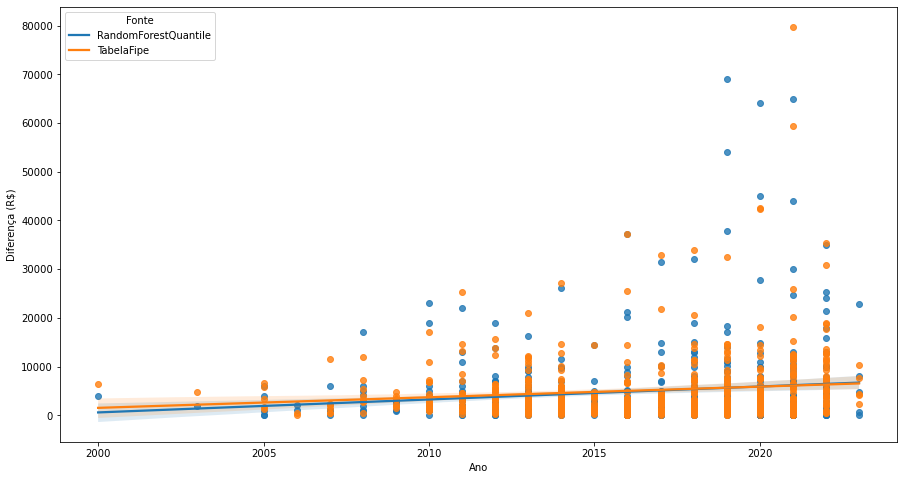

In [87]:
plt.figure(figsize=(15,8))
sns.regplot(x='Ano', y='DifModelo', data=df_comp.loc[df_comp['DifModelo']<100000]).set_ylabel('Diferença (R$)')
sns.regplot(x='Ano', y='DifFipe', data=df_comp.loc[df_comp['DifFipe']<100000]).set_ylabel('Diferença (R$)')
plt.legend(title='Fonte', loc='upper left', labels=['RandomForestQuantile', 'TabelaFipe']);

In [88]:
df_comp_plot['FaixaAno'] = pd.cut(df_comp_plot['Ano'], bins=[1999, 2010, 2015, 2020, 2024], labels=['Anos 2000', '2011 a 2015', '2016 a 2020', '2021 ou mais'])

df_comp_plot.head()

,Km,FinalDePlaca,UnicoDono,AceitaTrocas,ArCondicionado,AirBag,Alarme,TravaEletrica,VidroEletrico,Som,...,Cor_Vermelho,Preco,PrecoFipe,PrecoModelo,DifFipe,DifModelo,Ano,Tipo,Dif,FaixaAno
0,230000,3,0,1,1,1,1,1,1,1,...,0.0,92900.0,108541.0,111900.0,15641.0,19000.0,2012,RandomForestQuantile,19000.0,2011 a 2015
1,54000,7,1,1,1,1,1,1,1,1,...,0.0,110990.0,107976.0,109900.0,3014.0,1090.0,2020,RandomForestQuantile,1090.0,2016 a 2020
2,82480,0,0,1,0,1,0,0,0,0,...,0.0,74799.0,74904.0,74997.0,105.0,198.0,2016,RandomForestQuantile,198.0,2016 a 2020
3,123000,1,0,0,1,1,1,1,1,1,...,0.0,138900.0,113498.0,127900.0,25402.0,11000.0,2011,RandomForestQuantile,11000.0,2011 a 2015
4,106633,3,0,1,1,1,0,1,1,0,...,0.0,64900.0,62004.0,64900.0,2896.0,0.0,2013,RandomForestQuantile,0.0,2011 a 2015


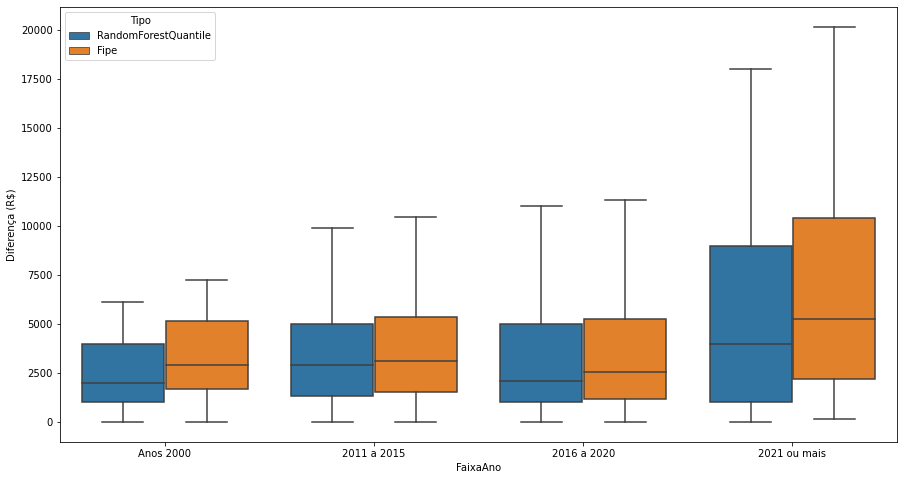

In [89]:
plt.figure(figsize=(15,8))
sns.boxplot(x='FaixaAno', y='Dif', hue='Tipo', data=df_comp_plot, showfliers=False).set_ylabel('Diferença (R$)');

In [102]:
df_comp_plot.groupby('FaixaAno')[['DifFipe', 'DifModelo']].agg(['mean', 'median'])

DifFipe            DifModelo        
                     mean  median         mean  median
FaixaAno                                              
Anos 2000     3945.914894  2928.0  3417.212766  2009.0
2011 a 2015   4423.337838  3113.5  3915.054054  2905.5
2016 a 2020   5082.680934  2548.0  5151.054644  2100.0
2021 ou mais  8119.690722  5269.0  7039.090335  4000.0

O modelo parece se comportar levemente melhor em veículos mais antigos, em relação à Tabela Fipe.

## Desempenho por quilometragem

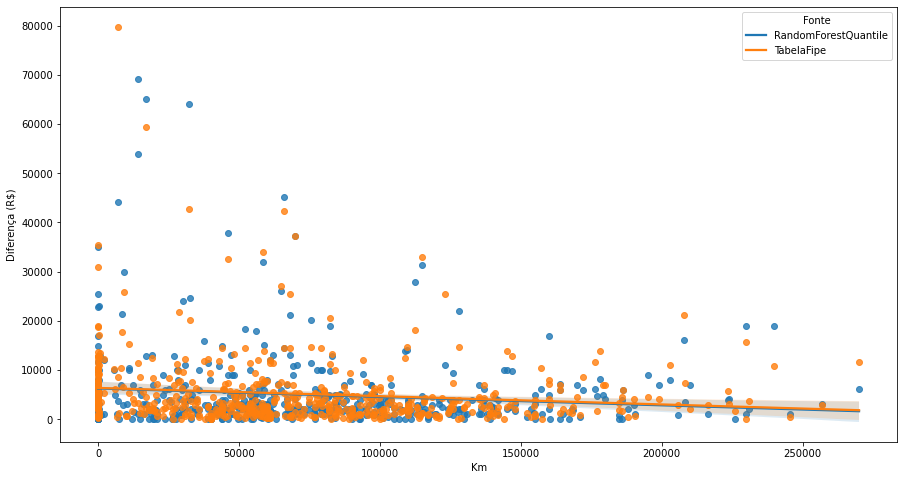

In [90]:
plt.figure(figsize=(15,8))
sns.regplot(x='Km', y='DifModelo', data=df_comp.loc[df_comp['DifModelo']<100000]).set_ylabel('Diferença (R$)')
sns.regplot(x='Km', y='DifFipe', data=df_comp.loc[df_comp['DifFipe']<100000]).set_ylabel('Diferença (R$)')
plt.legend(title='Fonte', loc='upper right', labels=['RandomForestQuantile', 'TabelaFipe']);

In [91]:
df_comp_plot['FaixaKm'] = pd.cut(df_comp_plot['Km'], bins=[-1, 30000, 60000, 100000, 999999], labels=['0-30km', '30-60km', '60-100km', '100kmOuMais'])

df_comp_plot

,Km,FinalDePlaca,UnicoDono,AceitaTrocas,ArCondicionado,AirBag,Alarme,TravaEletrica,VidroEletrico,Som,...,Preco,PrecoFipe,PrecoModelo,DifFipe,DifModelo,Ano,Tipo,Dif,FaixaAno,FaixaKm
0,230000,3,0,1,1,1,1,1,1,1,...,92900.0,108541.0,111900.0,15641.0,19000.0,2012,RandomForestQuantile,19000.0,2011 a 2015,100kmOuMais
1,54000,7,1,1,1,1,1,1,1,1,...,110990.0,107976.0,109900.0,3014.0,1090.0,2020,RandomForestQuantile,1090.0,2016 a 2020,30-60km
2,82480,0,0,1,0,1,0,0,0,0,...,74799.0,74904.0,74997.0,105.0,198.0,2016,RandomForestQuantile,198.0,2016 a 2020,60-100km
3,123000,1,0,0,1,1,1,1,1,1,...,138900.0,113498.0,127900.0,25402.0,11000.0,2011,RandomForestQuantile,11000.0,2011 a 2015,100kmOuMais
4,106633,3,0,1,1,1,0,1,1,0,...,64900.0,62004.0,64900.0,2896.0,0.0,2013,RandomForestQuantile,0.0,2011 a 2015,100kmOuMais
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,52624,4,0,1,1,0,1,1,0,0,...,90890.0,91745.0,92900.0,855.0,2010.0,2020,Fipe,855.0,2016 a 2020,30-60km
545,46789,3,0,1,1,1,0,0,1,0,...,62900.0,57219.0,57990.0,5681.0,4910.0,2018,Fipe,5681.0,2016 a 2020,30-60km
546,146000,9,0,1,1,1,0,0,1,1,...,44990.0,42085.0,42500.0,2905.0,2490.0,2016,Fipe,2905.0,2016 a 2020,100kmOuMais
547,18800,3,1,1,1,1,1,1,1,1,...,88900.0,87046.0,89900.0,1854.0,1000.0,2021,Fipe,1854.0,2021 ou mais,0-30km


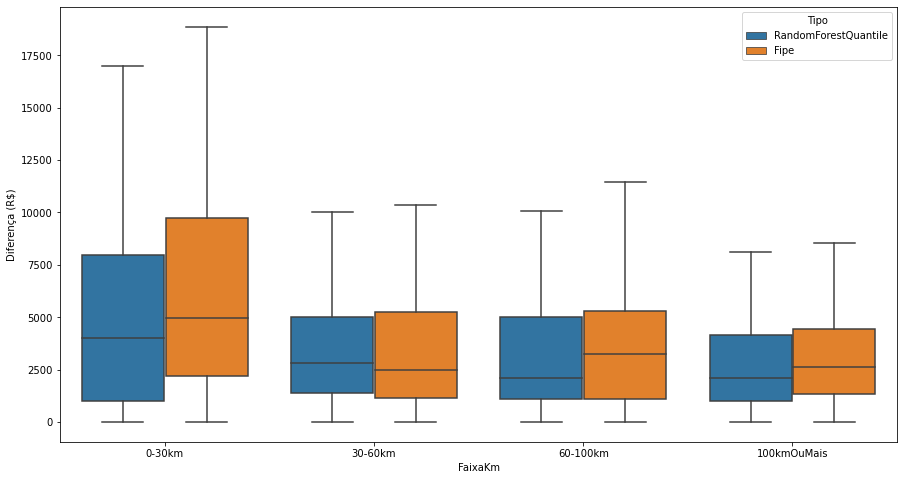

In [92]:
plt.figure(figsize=(15,8))
sns.boxplot(x='FaixaKm', y='Dif', hue='Tipo', data=df_comp_plot, showfliers=False).set_ylabel('Diferença (R$)');

In [98]:
df_comp_plot.groupby('FaixaKm')[['DifFipe', 'DifModelo']].agg(['mean', 'median'])

DifFipe            DifModelo        
                    mean  median         mean  median
FaixaKm                                              
0-30km       8228.234848  4965.0  7016.441721  4000.0
30-60km      4473.962121  2478.5  4762.515299  2795.0
60-100km     4694.827338  3246.0  4489.939882  2090.0
100kmOuMais  4141.780822  2649.0  3888.533123  2094.5

O modelo parece ter um desempenho melhor em veículos menos rodados, na faixa de 0 a 30 mil quilômetros.

## Desempenho por número de opcionais

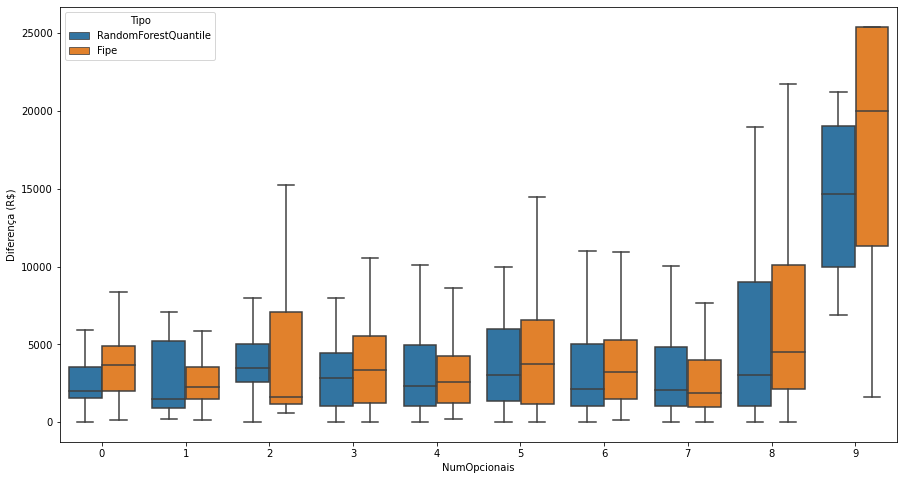

In [93]:
plt.figure(figsize=(15,8))
sns.boxplot(x='NumOpcionais', y='Dif', hue='Tipo', data=df_comp_plot, showfliers=False).set_ylabel('Diferença (R$)');

In [99]:
df_comp_plot.groupby('NumOpcionais')[['DifFipe', 'DifModelo']].agg(['mean', 'median'])

DifFipe              DifModelo         
                      mean   median          mean   median
NumOpcionais                                              
0              4241.114286   3663.0   3609.400000   2010.0
1              2836.000000   2256.0   3643.625000   1505.0
2              5131.909091   1638.0   4200.272727   3483.0
3              5719.774194   3368.0   5846.193548   2810.0
4              4150.590909   2572.0   4340.070357   2295.0
5              4760.131868   3743.0   5191.421979   3000.0
6              4612.464646   3210.0   3946.818182   2100.0
7              3358.945652   1835.0   3872.872904   2090.0
8              8833.330357   4490.5   7146.727280   3055.0
9             16744.750000  19991.0  14350.000000  14645.0

O modelo parece errar menos para veículos com muitos itens opcionais (8 ou 9).

## Desempenho por preço

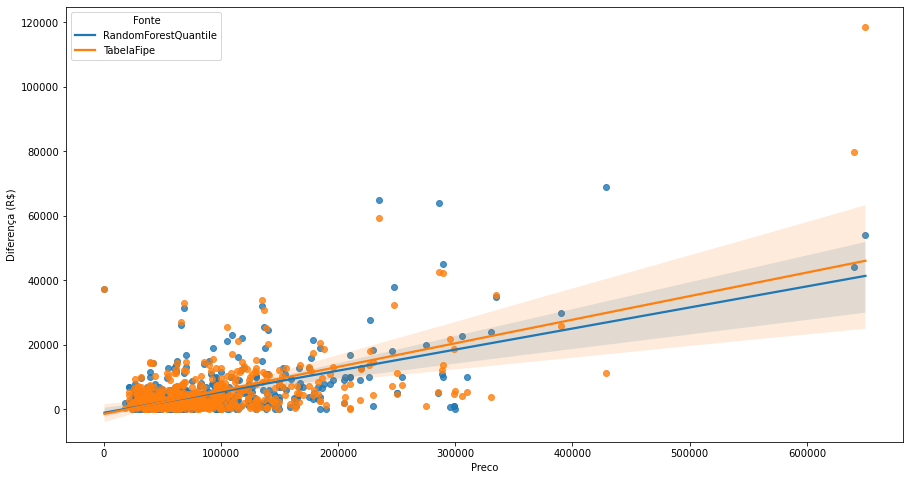

In [94]:
plt.figure(figsize=(15,8))
sns.regplot(x='Preco', y='DifModelo', data=df_comp).set_ylabel('Diferença (R$)')
sns.regplot(x='Preco', y='DifFipe', data=df_comp).set_ylabel('Diferença (R$)')
plt.legend(title='Fonte', loc='upper left', labels=['RandomForestQuantile', 'TabelaFipe']);

In [95]:
df_comp_plot['FaixaPreco'] = pd.cut(df_comp_plot['Preco'], bins=[-1, 50000, 100000, 200000, 10000000], labels=['0-50k', '50-100k', '100-200k', '200k ou mais'])

df_comp_plot.head()

,Km,FinalDePlaca,UnicoDono,AceitaTrocas,ArCondicionado,AirBag,Alarme,TravaEletrica,VidroEletrico,Som,...,PrecoFipe,PrecoModelo,DifFipe,DifModelo,Ano,Tipo,Dif,FaixaAno,FaixaKm,FaixaPreco
0,230000,3,0,1,1,1,1,1,1,1,...,108541.0,111900.0,15641.0,19000.0,2012,RandomForestQuantile,19000.0,2011 a 2015,100kmOuMais,50-100k
1,54000,7,1,1,1,1,1,1,1,1,...,107976.0,109900.0,3014.0,1090.0,2020,RandomForestQuantile,1090.0,2016 a 2020,30-60km,100-200k
2,82480,0,0,1,0,1,0,0,0,0,...,74904.0,74997.0,105.0,198.0,2016,RandomForestQuantile,198.0,2016 a 2020,60-100km,50-100k
3,123000,1,0,0,1,1,1,1,1,1,...,113498.0,127900.0,25402.0,11000.0,2011,RandomForestQuantile,11000.0,2011 a 2015,100kmOuMais,100-200k
4,106633,3,0,1,1,1,0,1,1,0,...,62004.0,64900.0,2896.0,0.0,2013,RandomForestQuantile,0.0,2011 a 2015,100kmOuMais,50-100k


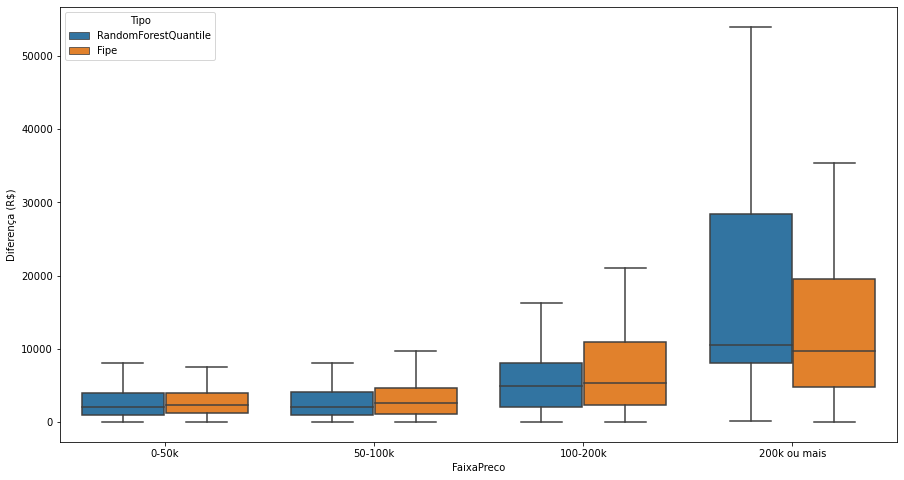

In [96]:
plt.figure(figsize=(15,8))
sns.boxplot(x='FaixaPreco', y='Dif', hue='Tipo', data=df_comp_plot, showfliers=False).set_ylabel('Diferença (R$)');

In [101]:
df_comp_plot.groupby('FaixaPreco')[['DifFipe', 'DifModelo']].agg(['mean', 'median'])

DifFipe             DifModelo         
                      mean  median          mean   median
FaixaPreco                                               
0-50k          3301.790541  2369.0   2913.307866   2000.0
50-100k        3718.479508  2533.0   3411.178096   2010.0
100-200k       7226.933884  5317.0   6260.424026   4900.0
200k ou mais  18431.611111  9687.0  20156.707764  10540.5

O modelo de Machine Learning parece ter um desempenho melhor em veículos na faixa de 50 a 200 mil reais.

# Salvando os encoders e o modelo

In [186]:
# import pickle

# with open("ohe.pkl", "wb") as file:
#     pickle.dump(obj=ohe, file=file)
    
# with open("rfqr.pkl", "wb") as file:
#     pickle.dump(obj=rfqr, file=file)